# Strategie ewolucyjne

Notebook pokazuje podstawowe mechanizmy strategii ewolucyjnych.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

## Przykładowe problemy testowe

In [2]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [3]:
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [4]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

In [5]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [6]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [7]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(9, 9))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

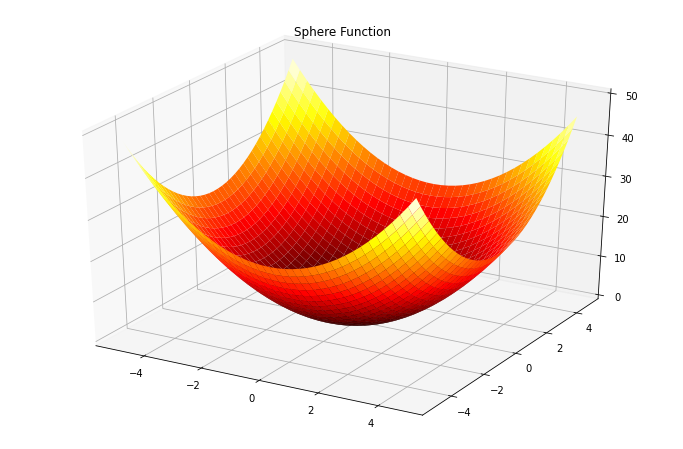

In [8]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

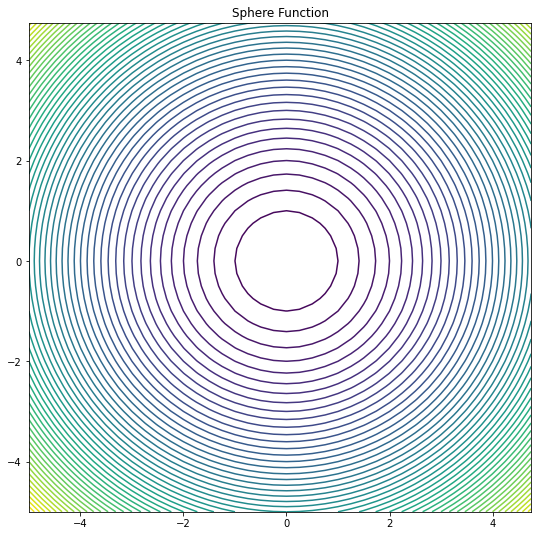

In [9]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

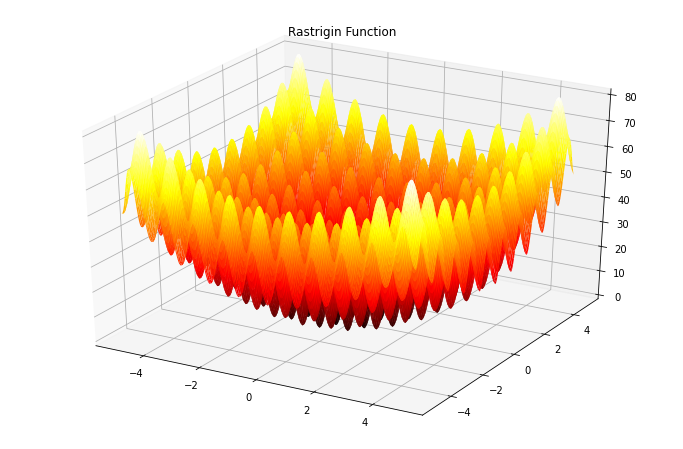

In [10]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

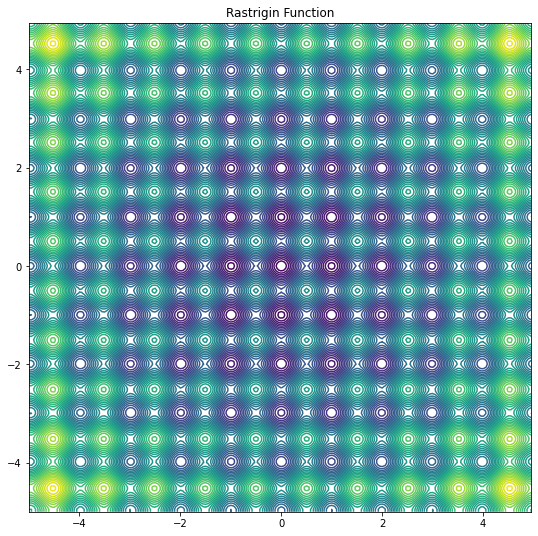

In [11]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

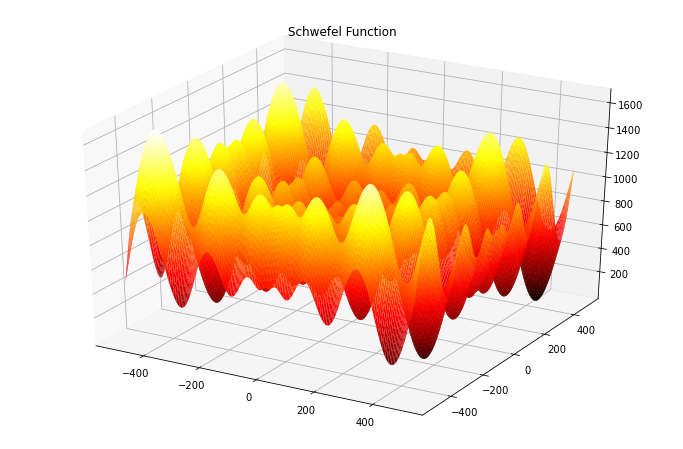

In [12]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

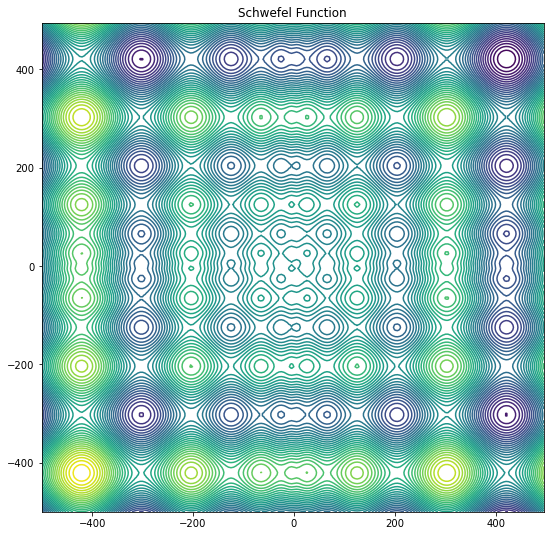

In [13]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

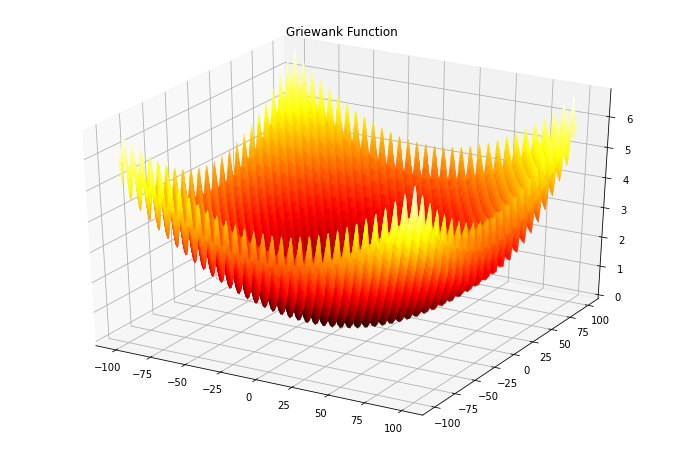

In [14]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

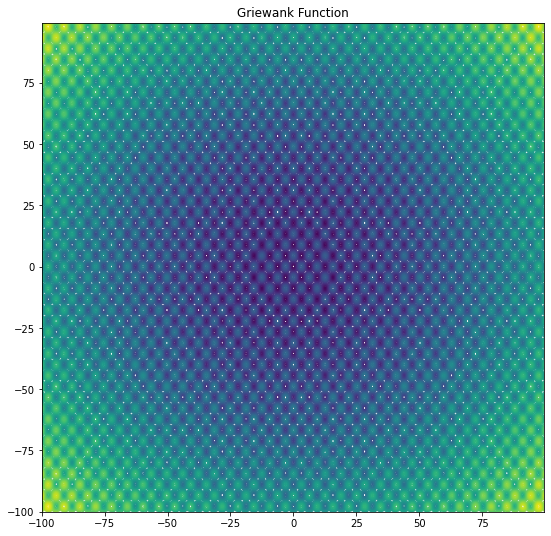

In [15]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

## Przykładowe modele mutacji

In [17]:
N = 250
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [18]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)

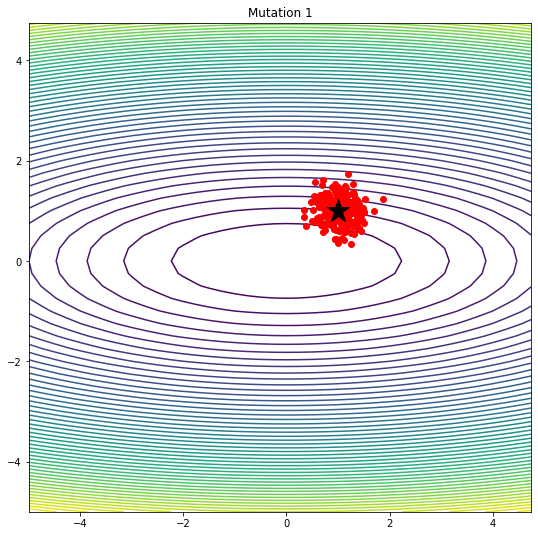

In [19]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

In [20]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

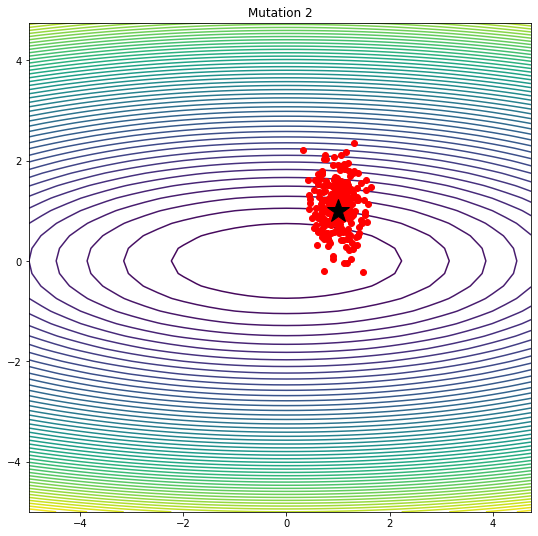

In [21]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [22]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

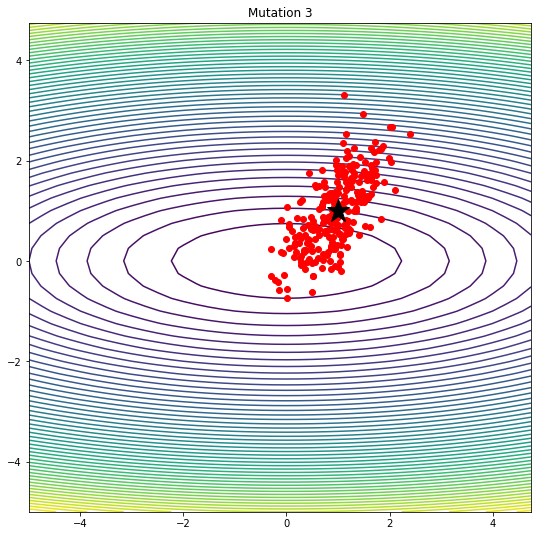

In [23]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

## Przykładowa strategia ewolucyjna

In [24]:
def es(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=1):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = 0.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)

        # mutating the children population by adding random gaussian noise
        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)

        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

### Działanie strategii ewolucyjnej dla funkcji sferycznej F1

Iteration 0000 : best score = -6271.41078549, mean score = -26296.02719420.
Iteration 0010 : best score = -35.24605548, mean score = -205.17522503.
Iteration 0020 : best score = -0.11741457, mean score = -0.49970357.
Iteration 0030 : best score = -0.00014770, mean score = -0.00105027.
Iteration 0040 : best score = -0.00000033, mean score = -0.00000196.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


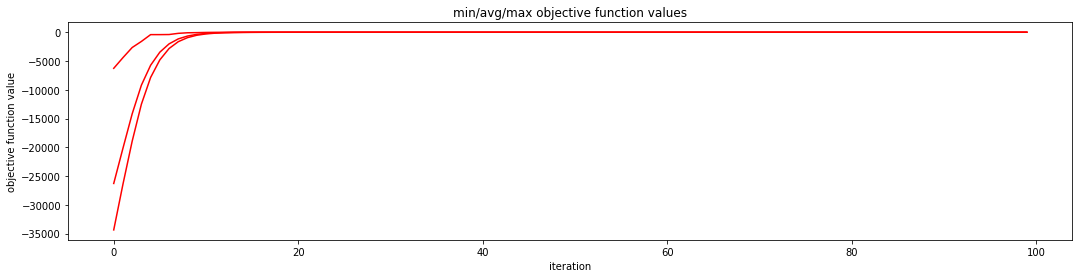

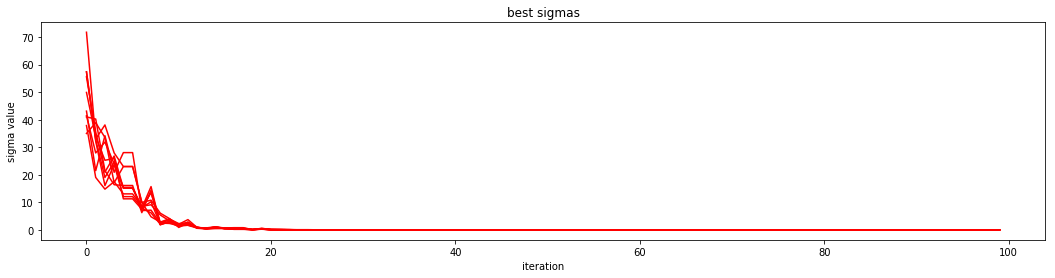

In [24]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -26088.30777006, mean score = -58946.81604438.
Iteration 0010 : best score = -979.15541841, mean score = -2194.43637925.
Iteration 0020 : best score = -24.15775266, mean score = -55.37969956.
Iteration 0030 : best score = -0.51454001, mean score = -1.34315539.
Iteration 0040 : best score = -0.01312168, mean score = -0.03073155.
Iteration 0050 : best score = -0.00029926, mean score = -0.00075880.
Iteration 0060 : best score = -0.00000919, mean score = -0.00002195.
Iteration 0070 : best score = -0.00000027, mean score = -0.00000063.
Iteration 0080 : best score = -0.00000001, mean score = -0.00000002.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


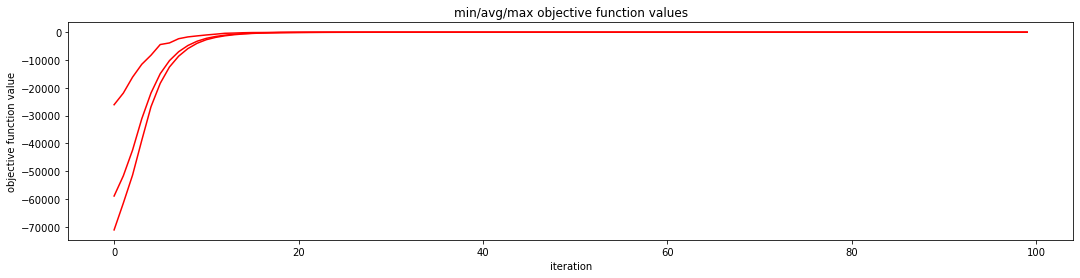

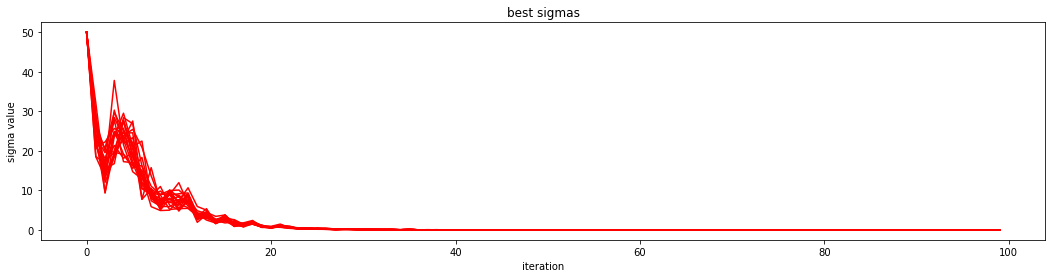

In [41]:
d = 20
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -96240.36901413, mean score = -161086.85276119.
Iteration 0010 : best score = -20057.94902858, mean score = -28965.73255897.
Iteration 0020 : best score = -3572.11347960, mean score = -5252.99088068.
Iteration 0030 : best score = -684.52007559, mean score = -1123.03949077.
Iteration 0040 : best score = -161.83109459, mean score = -241.17699209.
Iteration 0050 : best score = -35.94313561, mean score = -55.36085520.
Iteration 0060 : best score = -8.64631711, mean score = -12.61807880.
Iteration 0070 : best score = -2.17337060, mean score = -3.10911077.
Iteration 0080 : best score = -0.57942431, mean score = -0.77681827.
Iteration 0090 : best score = -0.14846612, mean score = -0.19772314.


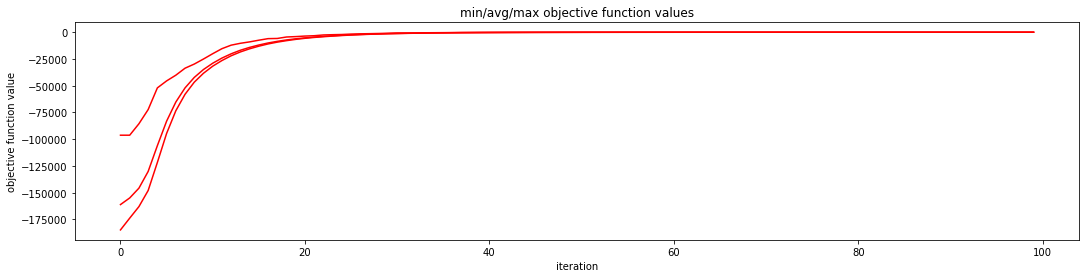

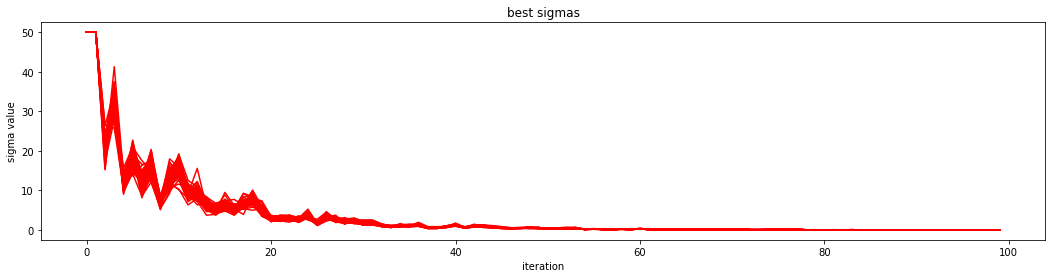

In [42]:
d = 50
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -234594.20521714, mean score = -328476.75451161.
Iteration 0010 : best score = -102726.65796327, mean score = -130771.23817471.
Iteration 0020 : best score = -38733.84955467, mean score = -47279.38610154.
Iteration 0030 : best score = -17423.81810226, mean score = -21679.88663663.
Iteration 0040 : best score = -8764.35344606, mean score = -10339.76619308.
Iteration 0050 : best score = -4057.68586409, mean score = -4814.31828107.
Iteration 0060 : best score = -1969.86908713, mean score = -2287.63608216.
Iteration 0070 : best score = -952.04494944, mean score = -1149.18532663.
Iteration 0080 : best score = -489.67966172, mean score = -563.08521823.
Iteration 0090 : best score = -240.03556690, mean score = -279.62458303.
Iteration 0100 : best score = -114.28485538, mean score = -141.97448717.
Iteration 0110 : best score = -60.53992258, mean score = -69.76136700.
Iteration 0120 : best score = -29.74849477, mean score = -36.05521130.
Iteration 0130 : best score

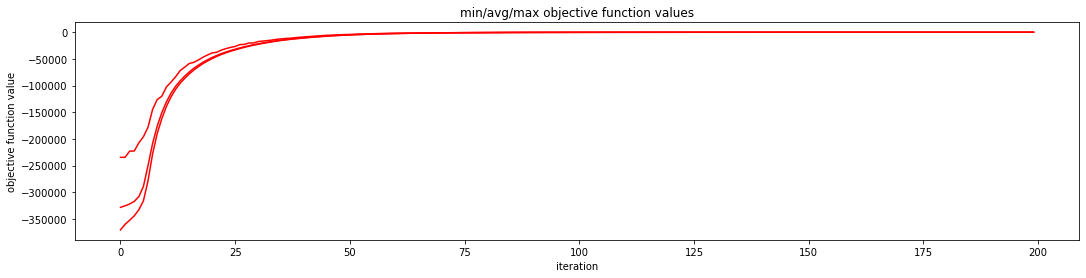

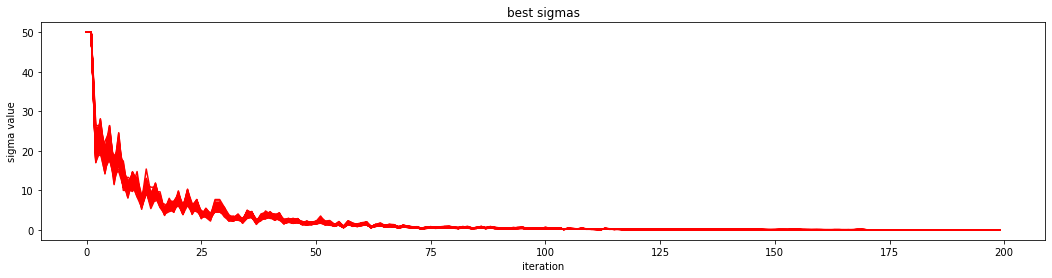

In [43]:
d = 100
N = 2000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -232654.30045137, mean score = -294689.05520505.
Iteration 0010 : best score = -89754.17377753, mean score = -108058.71177629.
Iteration 0020 : best score = -40558.50093564, mean score = -47197.89723415.
Iteration 0030 : best score = -17733.66064800, mean score = -21684.86376843.
Iteration 0040 : best score = -8532.40697584, mean score = -9973.20445914.
Iteration 0050 : best score = -4054.78586949, mean score = -4702.91450388.
Iteration 0060 : best score = -1781.10552802, mean score = -2222.42354203.
Iteration 0070 : best score = -905.01610462, mean score = -1088.92336623.
Iteration 0080 : best score = -466.06315730, mean score = -537.30260240.
Iteration 0090 : best score = -207.32664365, mean score = -248.36992830.
Iteration 0100 : best score = -102.35388915, mean score = -119.32889100.
Iteration 0110 : best score = -50.59547688, mean score = -60.54305249.
Iteration 0120 : best score = -26.04424640, mean score = -30.82336202.
Iteration 0130 : best score =

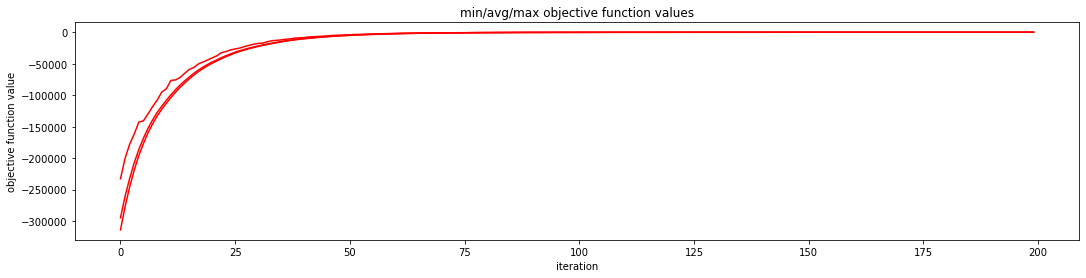

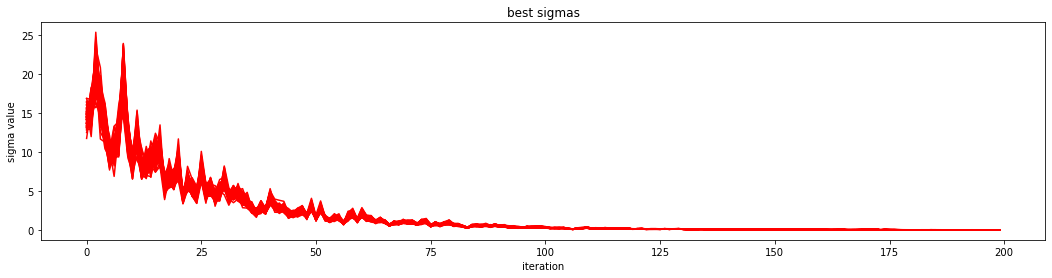

In [46]:
d = 100
N = 2000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 20.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Rastrigina F6

Iteration 0000 : best score = -6070.64129014, mean score = -26625.78603748.
Iteration 0010 : best score = -113.79844421, mean score = -304.33260433.
Iteration 0020 : best score = -34.39828158, mean score = -75.70627005.
Iteration 0030 : best score = -20.14501431, mean score = -61.78655932.
Iteration 0040 : best score = -20.14501431, mean score = -55.51577579.
Iteration 0050 : best score = -20.14501431, mean score = -51.08804997.
Iteration 0060 : best score = -1.12155817, mean score = -5.91850777.
Iteration 0070 : best score = -0.00161843, mean score = -0.01284879.
Iteration 0080 : best score = -0.00000590, mean score = -0.00002873.
Iteration 0090 : best score = -0.00000001, mean score = -0.00000006.


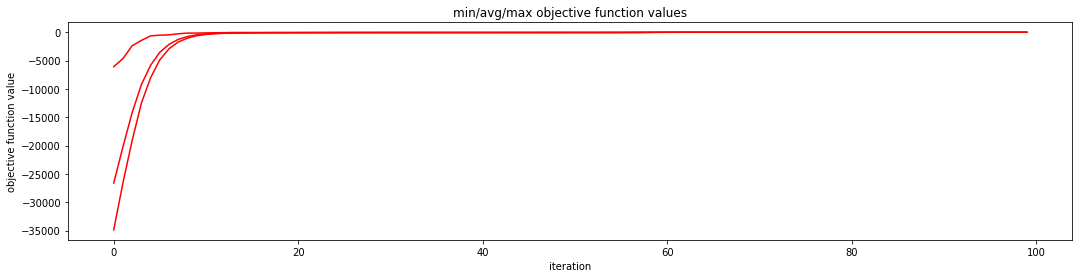

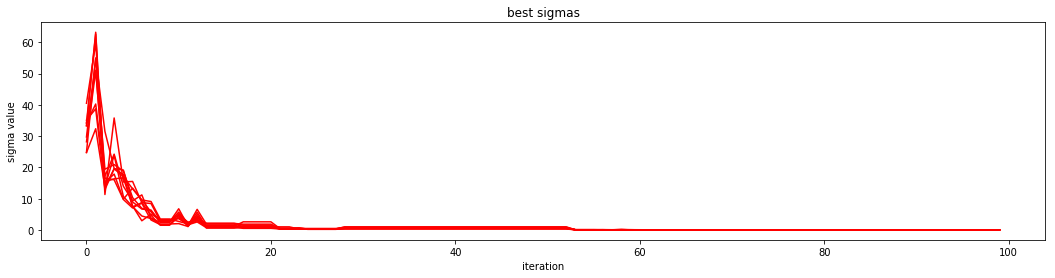

In [25]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -23299.80193497, mean score = -59989.13685063.
Iteration 0010 : best score = -1060.78864565, mean score = -2514.28106980.
Iteration 0020 : best score = -159.87762490, mean score = -253.63085915.
Iteration 0030 : best score = -96.53994239, mean score = -172.30883283.
Iteration 0040 : best score = -95.74837667, mean score = -154.57870073.
Iteration 0050 : best score = -76.86125309, mean score = -145.46924100.
Iteration 0060 : best score = -76.86125309, mean score = -139.15210835.
Iteration 0070 : best score = -72.37376790, mean score = -127.47126761.
Iteration 0080 : best score = -16.65135347, mean score = -21.48577499.
Iteration 0090 : best score = -14.98713362, mean score = -15.06940204.
Iteration 0100 : best score = -14.92548034, mean score = -14.92731824.
Iteration 0110 : best score = -14.92441613, mean score = -14.92445529.
Iteration 0120 : best score = -14.92438649, mean score = -14.92438767.
Iteration 0130 : best score = -14.92438588, mean score = -14

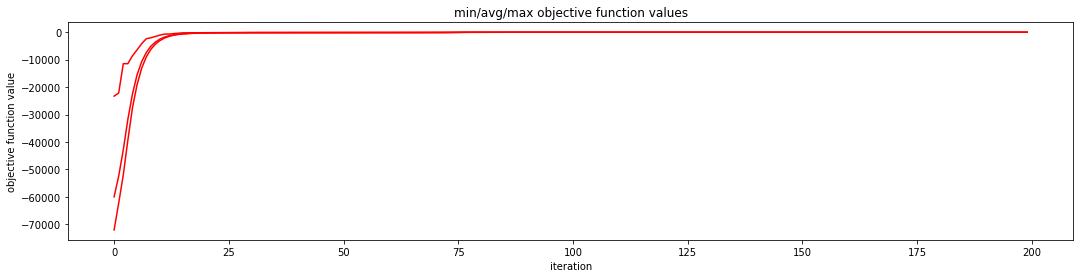

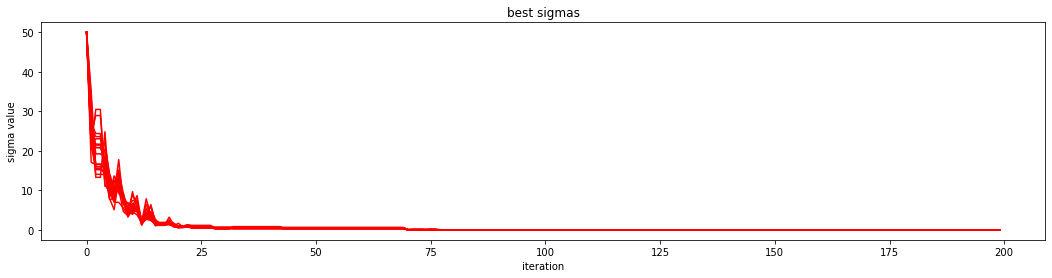

In [48]:
d = 20
N = 2000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -24148.45367128, mean score = -60113.81837590.
Iteration 0010 : best score = -1291.77293222, mean score = -3059.17266322.
Iteration 0020 : best score = -139.30571438, mean score = -237.28471168.
Iteration 0030 : best score = -99.68677226, mean score = -165.28030086.
Iteration 0040 : best score = -88.28257736, mean score = -149.36008693.
Iteration 0050 : best score = -84.58369189, mean score = -141.66406985.
Iteration 0060 : best score = -80.73066334, mean score = -136.70046343.
Iteration 0070 : best score = -80.73066334, mean score = -132.94434337.
Iteration 0080 : best score = -61.05699944, mean score = -130.25073060.
Iteration 0090 : best score = -61.05699944, mean score = -127.84548745.
Iteration 0100 : best score = -61.05699944, mean score = -126.13852424.
Iteration 0110 : best score = -61.05699944, mean score = -124.40873210.
Iteration 0120 : best score = -61.05699944, mean score = -122.83376476.
Iteration 0130 : best score = -61.05699944, mean score 

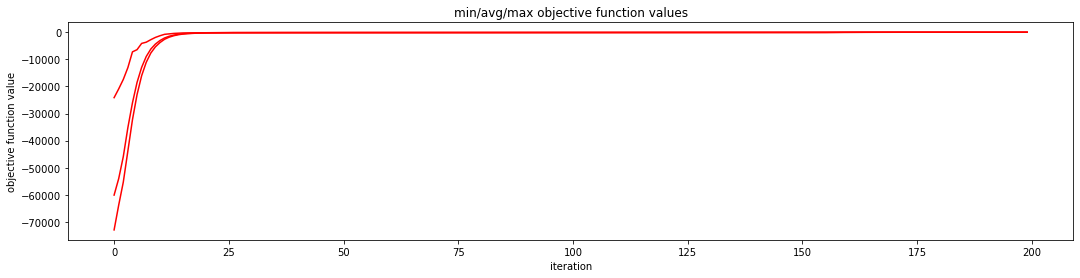

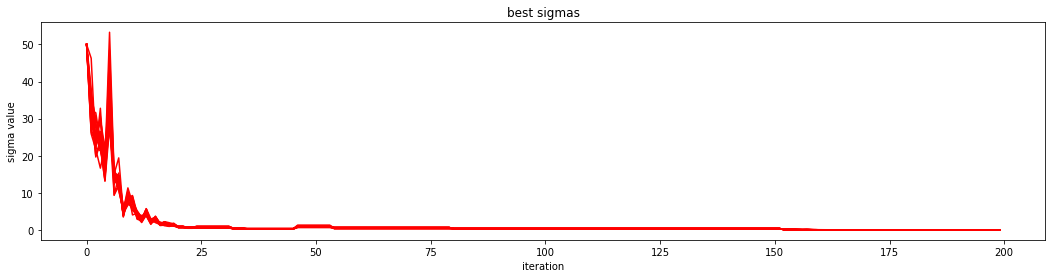

In [53]:
d = 20
N = 2000
T = 200
k = 0.8

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -24848.97996104, mean score = -60179.68025472.
Iteration 0020 : best score = -165.04910161, mean score = -260.78036656.
Iteration 0040 : best score = -87.93026820, mean score = -151.03828488.
Iteration 0060 : best score = -86.34442505, mean score = -137.66178354.
Iteration 0080 : best score = -83.36045915, mean score = -130.86798716.
Iteration 0100 : best score = -83.36045915, mean score = -126.12663107.
Iteration 0120 : best score = -75.90419644, mean score = -122.60252617.
Iteration 0140 : best score = -75.90419644, mean score = -119.95267237.
Iteration 0160 : best score = -57.65919236, mean score = -115.91482761.
Iteration 0180 : best score = -0.07477808, mean score = -0.22245674.
Iteration 0200 : best score = -0.00001317, mean score = -0.00005586.
Iteration 0220 : best score = -0.00000000, mean score = -0.00000001.
Iteration 0240 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0260 : best score = 0.00000000, mean score = 0.00000000.
Ite

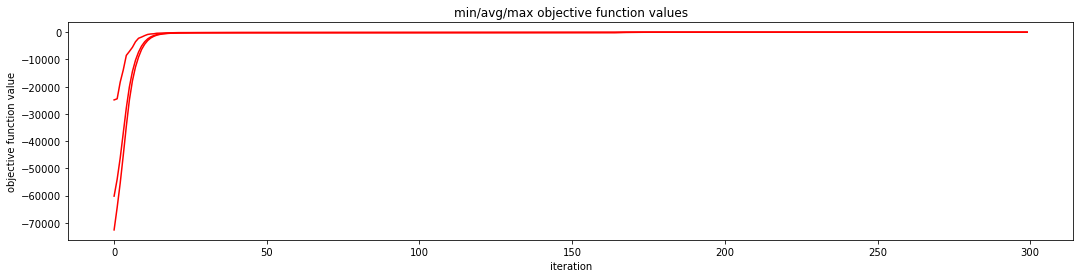

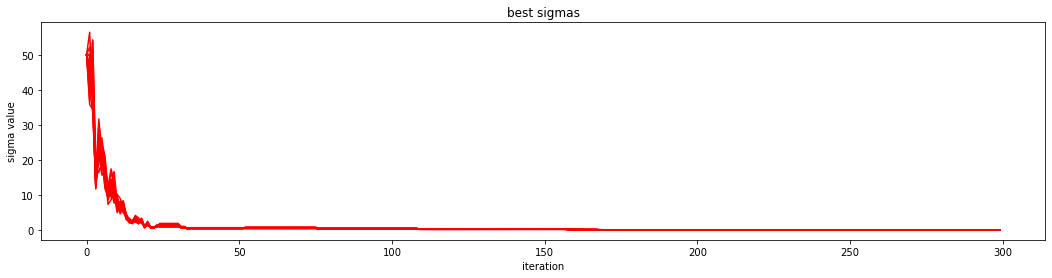

In [57]:
d = 20
N = 2000
T = 300
k = 0.70

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -103926.06941969, mean score = -162787.15445170.
Iteration 0020 : best score = -2838.16536490, mean score = -4367.97819067.
Iteration 0040 : best score = -441.94569517, mean score = -576.77038488.
Iteration 0060 : best score = -345.59451320, mean score = -477.10894379.
Iteration 0080 : best score = -345.59451320, mean score = -449.32048478.
Iteration 0100 : best score = -339.07881686, mean score = -432.47705304.
Iteration 0120 : best score = -143.33915204, mean score = -181.58176415.
Iteration 0140 : best score = -51.64056267, mean score = -53.27011282.
Iteration 0160 : best score = -48.78792474, mean score = -48.80853214.
Iteration 0180 : best score = -48.75343983, mean score = -48.75369023.
Iteration 0200 : best score = -48.75299660, mean score = -48.75300182.
Iteration 0220 : best score = -48.75298900, mean score = -48.75298909.
Iteration 0240 : best score = -48.75298877, mean score = -48.75298877.
Iteration 0260 : best score = -48.75298876, mean score 

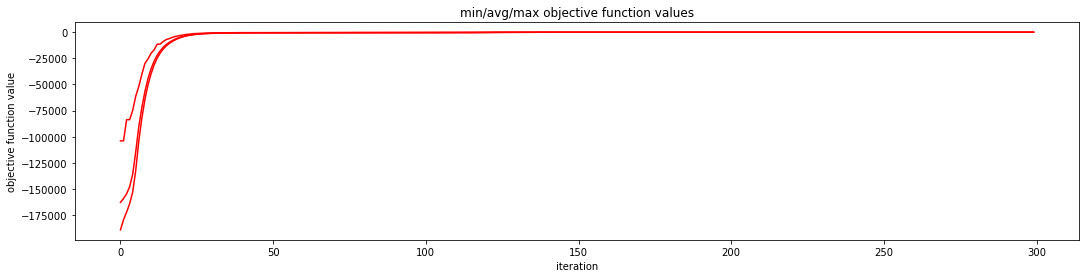

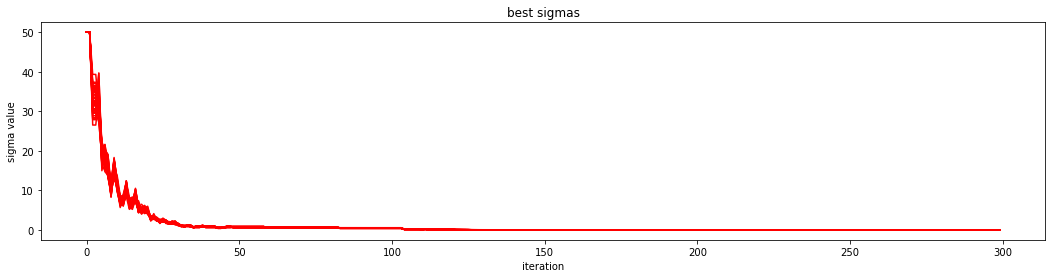

In [58]:
d = 50
N = 2000
T = 300
k = 0.70

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -95337.16687404, mean score = -163177.10031691.
Iteration 0020 : best score = -2740.04117893, mean score = -4362.13295165.
Iteration 0040 : best score = -447.71320328, mean score = -571.60709333.
Iteration 0060 : best score = -373.97173041, mean score = -466.64012712.
Iteration 0080 : best score = -331.09774140, mean score = -440.96544381.
Iteration 0100 : best score = -331.09774140, mean score = -427.92777642.
Iteration 0120 : best score = -331.09774140, mean score = -418.75265915.
Iteration 0140 : best score = -320.82803776, mean score = -411.82796126.
Iteration 0160 : best score = -320.82803776, mean score = -406.24468188.
Iteration 0180 : best score = -313.26734529, mean score = -400.98771798.
Iteration 0200 : best score = -308.81093602, mean score = -395.43193085.
Iteration 0220 : best score = -126.15951335, mean score = -156.94091543.
Iteration 0240 : best score = -42.55753525, mean score = -44.00167172.
Iteration 0260 : best score = -39.84657724, me

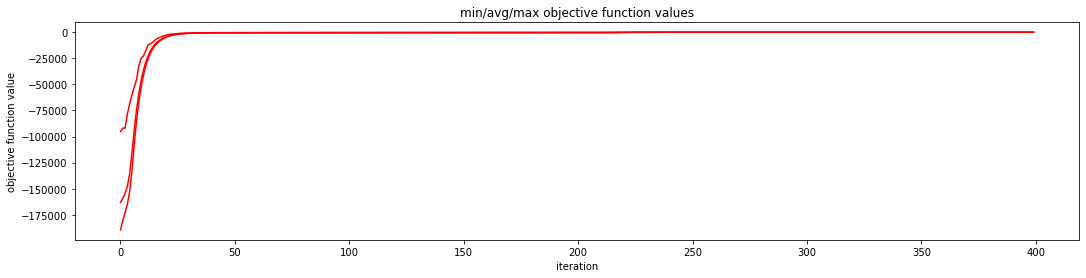

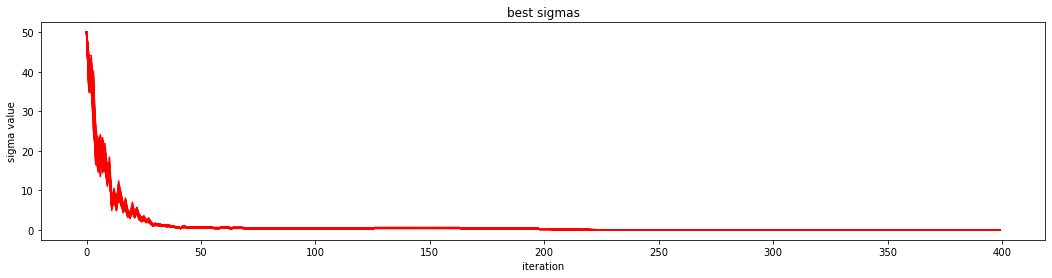

In [63]:
d = 50
N = 2000
T = 400
k = 0.7

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -92047.60503406, mean score = -162449.02655231.
Iteration 0020 : best score = -2769.46483602, mean score = -4147.91425238.
Iteration 0040 : best score = -443.41953347, mean score = -566.44810319.
Iteration 0060 : best score = -378.09950851, mean score = -472.42350121.
Iteration 0080 : best score = -354.52093992, mean score = -446.66044930.
Iteration 0100 : best score = -322.94313517, mean score = -431.51097892.
Iteration 0120 : best score = -322.94313517, mean score = -420.58337631.
Iteration 0140 : best score = -318.08616171, mean score = -409.31934412.
Iteration 0160 : best score = -78.17627660, mean score = -101.02264832.
Iteration 0180 : best score = -48.75178194, mean score = -49.27061121.
Iteration 0200 : best score = -47.77212139, mean score = -47.78109812.
Iteration 0220 : best score = -47.75819062, mean score = -47.75832271.
Iteration 0240 : best score = -47.75803294, mean score = -47.75803469.
Iteration 0260 : best score = -47.75802977, mean scor

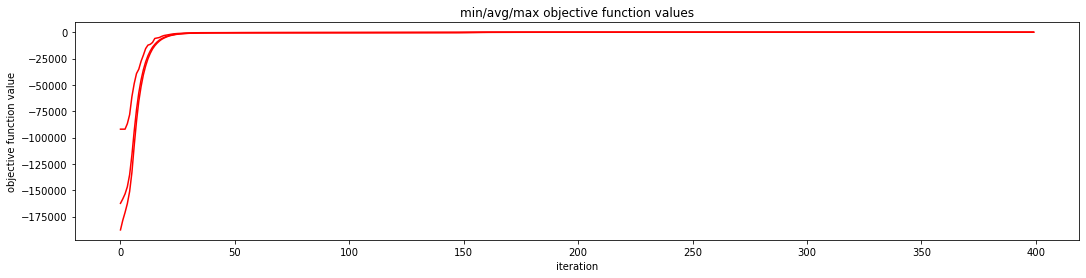

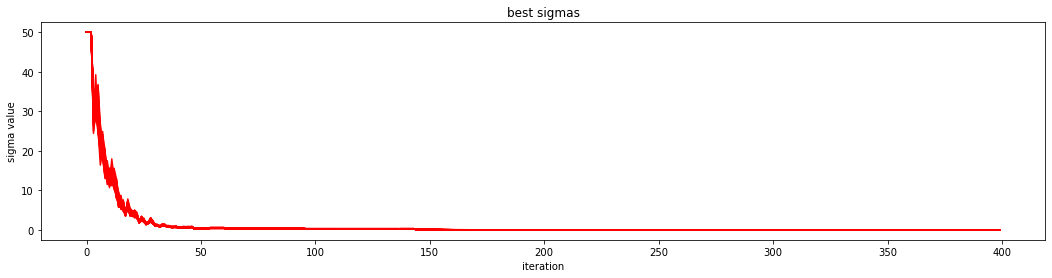

In [64]:
d = 50
N = 2000
T = 400
k = 0.7

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -97642.99527411, mean score = -162476.62292072.
Iteration 0020 : best score = -2729.37740779, mean score = -4122.48511265.
Iteration 0040 : best score = -474.19159844, mean score = -592.09094729.
Iteration 0060 : best score = -370.72295067, mean score = -478.36047308.
Iteration 0080 : best score = -335.65269607, mean score = -449.34882512.
Iteration 0100 : best score = -335.65269607, mean score = -434.09447142.
Iteration 0120 : best score = -335.65269607, mean score = -421.62507777.
Iteration 0140 : best score = -129.30887605, mean score = -148.86163316.
Iteration 0160 : best score = -61.86657319, mean score = -64.68264180.
Iteration 0180 : best score = -53.86562605, mean score = -53.97438175.
Iteration 0200 : best score = -53.72979102, mean score = -53.73100158.
Iteration 0220 : best score = -53.72783725, mean score = -53.72786765.
Iteration 0240 : best score = -53.72777561, mean score = -53.72777658.
Iteration 0260 : best score = -53.72777400, mean score

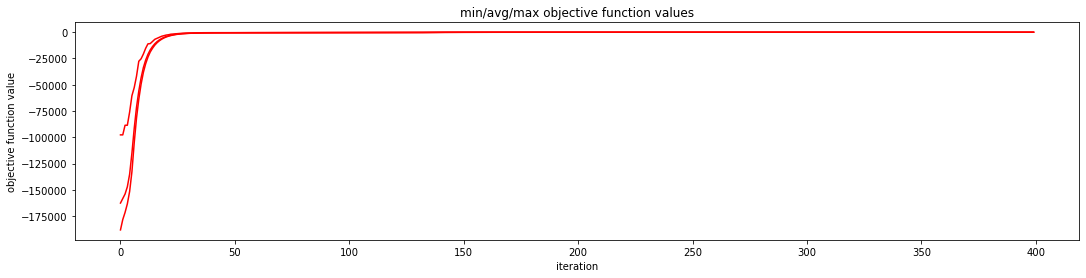

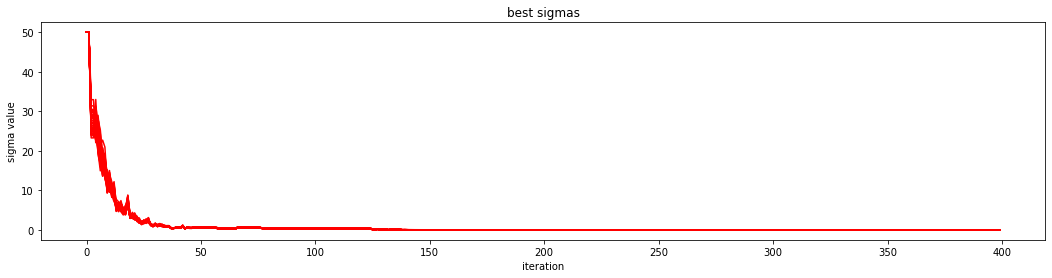

In [65]:
d = 50
N = 2000
T = 400
k = 0.75

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -93917.84792155, mean score = -161493.47545637.
Iteration 0020 : best score = -4126.30872222, mean score = -6004.83271700.
Iteration 0040 : best score = -633.25407218, mean score = -800.22783449.
Iteration 0060 : best score = -421.89892674, mean score = -544.03765572.
Iteration 0080 : best score = -381.41744258, mean score = -494.23207123.
Iteration 0100 : best score = -227.49929395, mean score = -302.52882640.
Iteration 0120 : best score = -105.83674198, mean score = -111.48747088.
Iteration 0140 : best score = -91.12230438, mean score = -91.33314558.
Iteration 0160 : best score = -90.56628954, mean score = -90.57728879.
Iteration 0180 : best score = -90.54285082, mean score = -90.54349195.
Iteration 0200 : best score = -90.54129065, mean score = -90.54133265.
Iteration 0220 : best score = -90.54119410, mean score = -90.54119622.
Iteration 0240 : best score = -90.54118885, mean score = -90.54118902.
Iteration 0260 : best score = -90.54118853, mean score =

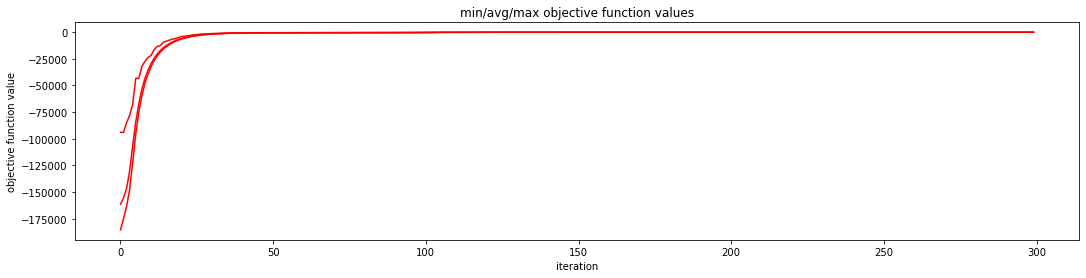

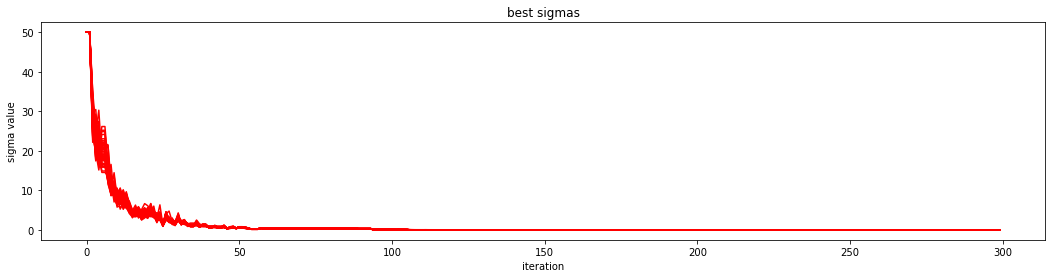

In [67]:
d = 50
N = 2000
T = 300
k = 1.0

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -96682.29578394, mean score = -162477.73328373.
Iteration 0020 : best score = -2552.81219332, mean score = -4029.01806194.
Iteration 0040 : best score = -433.65135258, mean score = -569.39674946.
Iteration 0060 : best score = -352.05735205, mean score = -471.58136210.
Iteration 0080 : best score = -327.56890049, mean score = -445.10937810.
Iteration 0100 : best score = -327.56890049, mean score = -431.30515258.
Iteration 0120 : best score = -315.92370258, mean score = -420.96273367.
Iteration 0140 : best score = -187.53607348, mean score = -259.91392275.
Iteration 0160 : best score = -53.00647092, mean score = -57.54842355.
Iteration 0180 : best score = -46.87562904, mean score = -46.93891130.
Iteration 0200 : best score = -46.76463022, mean score = -46.76568504.
Iteration 0220 : best score = -46.76310544, mean score = -46.76312311.
Iteration 0240 : best score = -46.76307628, mean score = -46.76307665.
Iteration 0260 : best score = -46.76307570, mean score

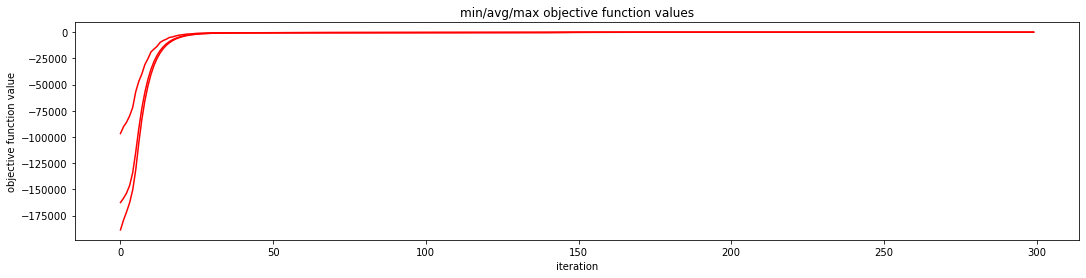

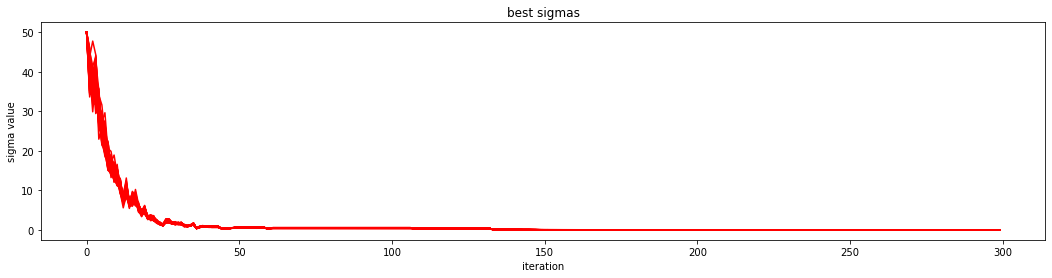

In [69]:
d = 50
N = 4000
T = 300
k = 0.7

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -99700.66235070, mean score = -166611.38204613.
Iteration 0020 : best score = -13029.84757860, mean score = -20797.65347727.
Iteration 0040 : best score = -567.12126075, mean score = -740.27076699.
Iteration 0060 : best score = -399.39461659, mean score = -481.69310857.
Iteration 0080 : best score = -347.11961228, mean score = -447.23613242.
Iteration 0100 : best score = -326.27516677, mean score = -431.02063491.
Iteration 0120 : best score = -317.96637756, mean score = -420.87116920.
Iteration 0140 : best score = -317.96637756, mean score = -412.99974341.
Iteration 0160 : best score = -317.96637756, mean score = -407.28874393.
Iteration 0180 : best score = -317.96637756, mean score = -401.02498952.
Iteration 0200 : best score = -185.61872269, mean score = -236.53919649.
Iteration 0220 : best score = -52.99217822, mean score = -58.15575006.
Iteration 0240 : best score = -33.56341818, mean score = -34.16430535.
Iteration 0260 : best score = -32.83862532, me

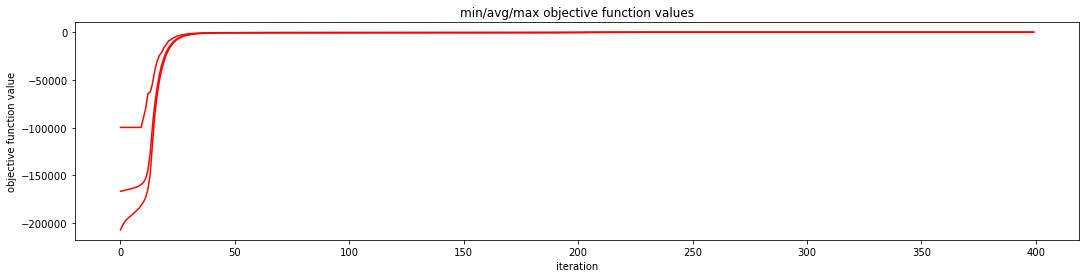

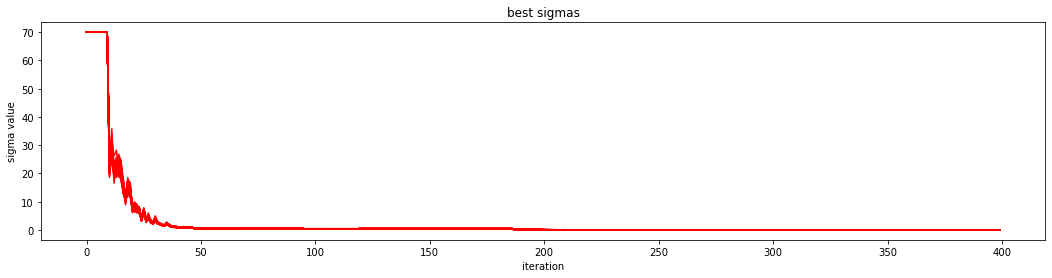

In [71]:
d = 50
N = 2000
T = 400
k = 0.7
s = 70.0

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, s, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -89303.23970224, mean score = -166143.49246437.
Iteration 0020 : best score = -11756.28464061, mean score = -22761.29874559.
Iteration 0040 : best score = -529.26861604, mean score = -698.53598129.
Iteration 0060 : best score = -378.37169659, mean score = -472.44857092.
Iteration 0080 : best score = -359.33253502, mean score = -439.62943026.
Iteration 0100 : best score = -334.60952973, mean score = -425.29392482.
Iteration 0120 : best score = -334.60952973, mean score = -415.48882901.
Iteration 0140 : best score = -334.60952973, mean score = -408.10957727.
Iteration 0160 : best score = -334.60952973, mean score = -402.63717331.
Iteration 0180 : best score = -317.71045391, mean score = -397.50139392.
Iteration 0200 : best score = -122.04392765, mean score = -162.39246631.
Iteration 0220 : best score = -40.89075882, mean score = -42.12838133.
Iteration 0240 : best score = -38.85260282, mean score = -38.87913271.
Iteration 0260 : best score = -38.80468395, me

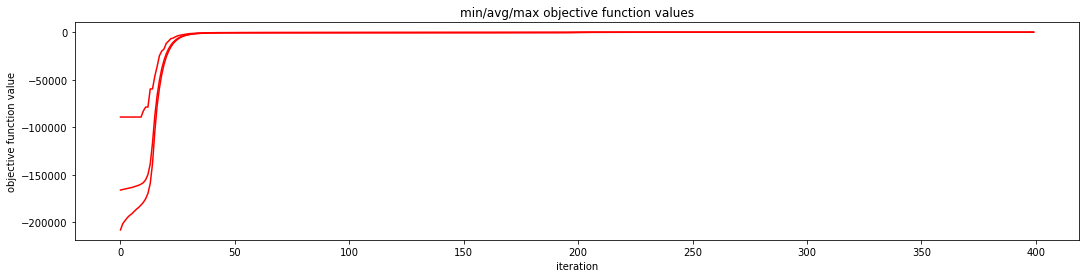

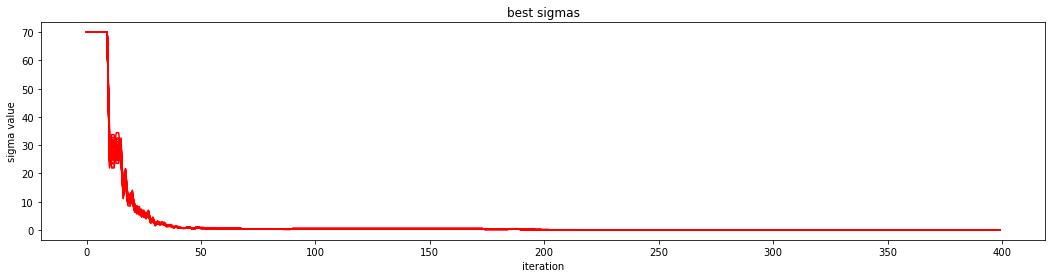

In [75]:
d = 50
N = 2000
T = 400
k = 0.67
s = 70.0

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, s, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -238143.52200960, mean score = -333758.79066720.
Iteration 0020 : best score = -238143.52200960, mean score = -332730.31379693.
Iteration 0040 : best score = -238143.52200960, mean score = -331433.89169880.
Iteration 0060 : best score = -152532.64001299, mean score = -281883.12284250.
Iteration 0080 : best score = -11240.16104868, mean score = -14059.06633433.
Iteration 0100 : best score = -2331.96091839, mean score = -2713.70152440.
Iteration 0120 : best score = -1238.15874271, mean score = -1409.26880885.
Iteration 0140 : best score = -1025.12110703, mean score = -1174.33001232.
Iteration 0160 : best score = -958.13392728, mean score = -1105.82072859.
Iteration 0180 : best score = -931.16704580, mean score = -1073.06488987.
Iteration 0200 : best score = -918.87982633, mean score = -1049.93337388.
Iteration 0220 : best score = -896.27882534, mean score = -1030.08652767.
Iteration 0240 : best score = -896.27882534, mean score = -1015.66316996.
Iteration 02

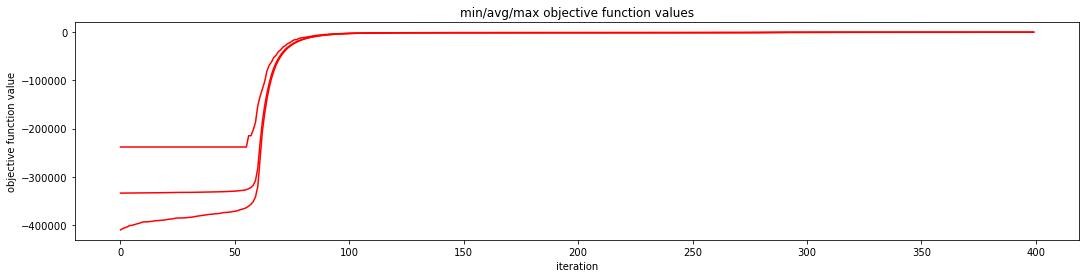

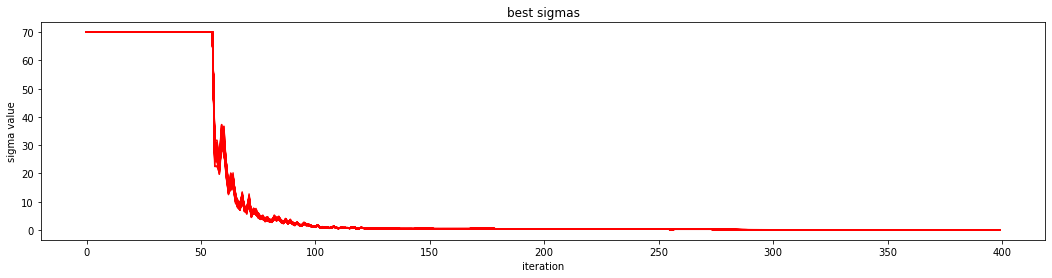

In [76]:
d = 100
N = 2000
T = 400
k = 0.67
s = 70.0

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, s, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -230790.66139597, mean score = -334465.15216705.
Iteration 0020 : best score = -230790.66139597, mean score = -332709.74055611.
Iteration 0040 : best score = -230790.66139597, mean score = -327383.49891046.
Iteration 0060 : best score = -23014.83170231, mean score = -28628.03803009.
Iteration 0080 : best score = -3181.32087918, mean score = -3825.47340820.
Iteration 0100 : best score = -1322.99325910, mean score = -1581.06852992.
Iteration 0120 : best score = -1065.44715479, mean score = -1224.83295420.
Iteration 0140 : best score = -1011.00732193, mean score = -1128.90068067.
Iteration 0160 : best score = -975.73292506, mean score = -1081.77909550.
Iteration 0180 : best score = -892.64773255, mean score = -1050.92823301.
Iteration 0200 : best score = -788.24810503, mean score = -960.24953233.
Iteration 0220 : best score = -319.31006907, mean score = -342.76462254.
Iteration 0240 : best score = -222.32226936, mean score = -228.82370149.
Iteration 0260 : be

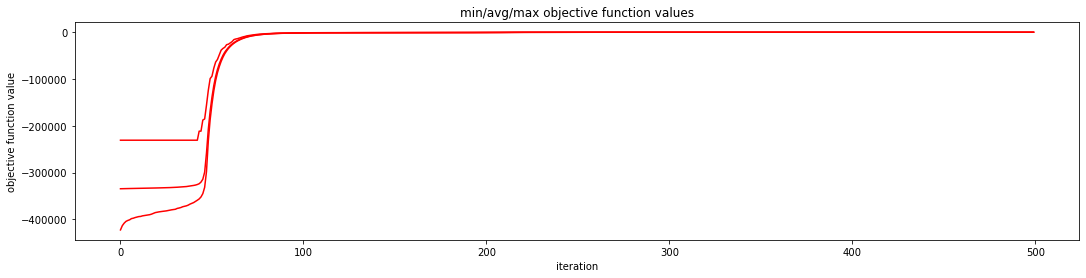

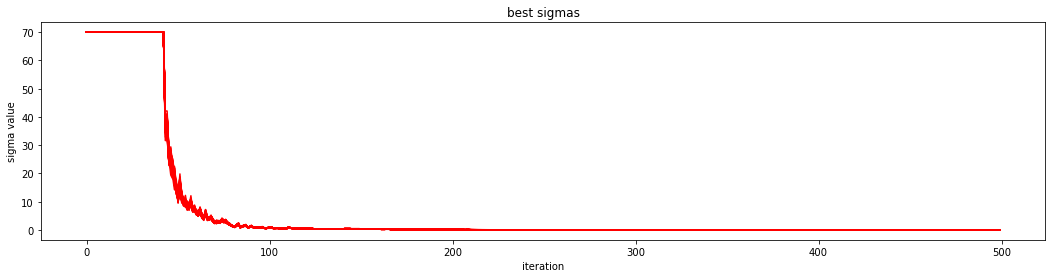

In [77]:
d = 100
N = 2000
T = 500
k = 0.7
s = 70.0

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, s, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -248464.51897176, mean score = -334466.61540274.
Iteration 0020 : best score = -248464.51897176, mean score = -333988.42986886.
Iteration 0040 : best score = -248464.51897176, mean score = -333428.49863937.
Iteration 0060 : best score = -248464.51897176, mean score = -332780.46212932.
Iteration 0080 : best score = -248464.51897176, mean score = -331632.35433554.
Iteration 0100 : best score = -246812.31845101, mean score = -326936.21208272.
Iteration 0120 : best score = -17195.23155784, mean score = -21862.16458261.
Iteration 0140 : best score = -2179.43319854, mean score = -2672.92589763.
Iteration 0160 : best score = -1092.51968734, mean score = -1287.01776775.
Iteration 0180 : best score = -952.97511682, mean score = -1108.83118363.
Iteration 0200 : best score = -917.86703741, mean score = -1048.52828443.
Iteration 0220 : best score = -879.32179574, mean score = -1017.01405877.
Iteration 0240 : best score = -879.32179574, mean score = -994.20944994.
Iter

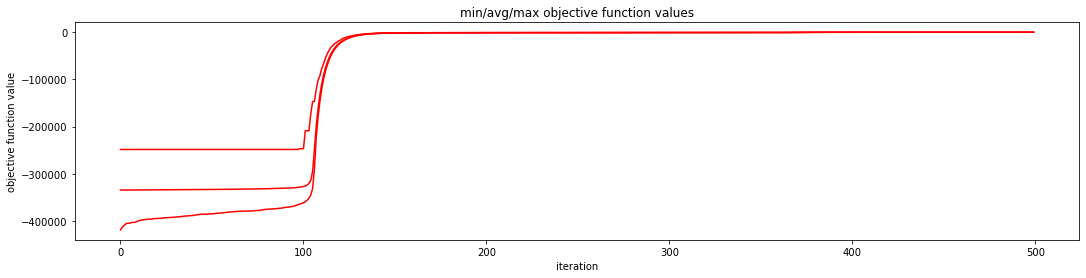

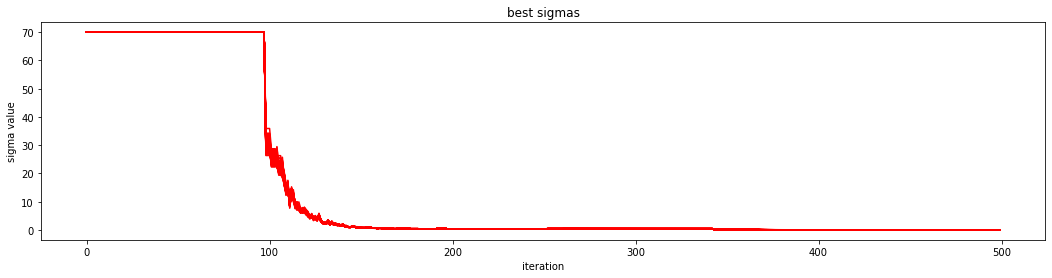

In [78]:
d = 100
N = 2000
T = 500
k = 0.6
s = 70.0

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, s, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -244105.12883006, mean score = -333435.68422053.
Iteration 0020 : best score = -244105.12883006, mean score = -331871.25837287.
Iteration 0040 : best score = -244105.12883006, mean score = -330409.78925345.
Iteration 0060 : best score = -244105.12883006, mean score = -327813.37828235.
Iteration 0080 : best score = -146580.87512662, mean score = -232900.18397970.
Iteration 0100 : best score = -8887.73589703, mean score = -11217.37805396.
Iteration 0120 : best score = -2129.69116250, mean score = -2528.56251154.
Iteration 0140 : best score = -1275.63664999, mean score = -1437.24003882.
Iteration 0160 : best score = -1076.57573869, mean score = -1232.55702560.
Iteration 0180 : best score = -1027.71318692, mean score = -1156.67536569.
Iteration 0200 : best score = -938.18323062, mean score = -1117.66675090.
Iteration 0220 : best score = -938.18323062, mean score = -1092.75869865.
Iteration 0240 : best score = -938.18323062, mean score = -1072.88254428.
Iterati

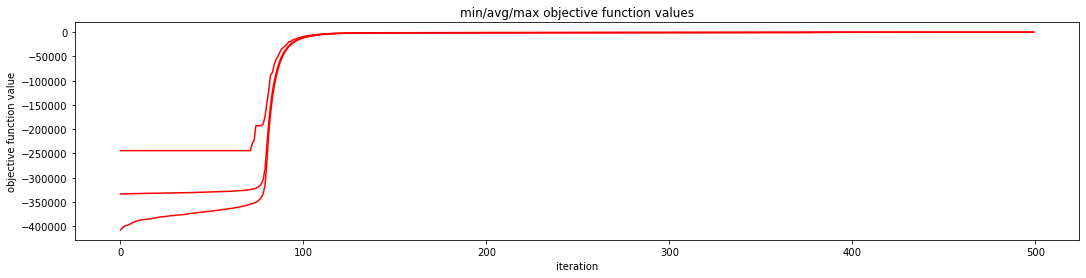

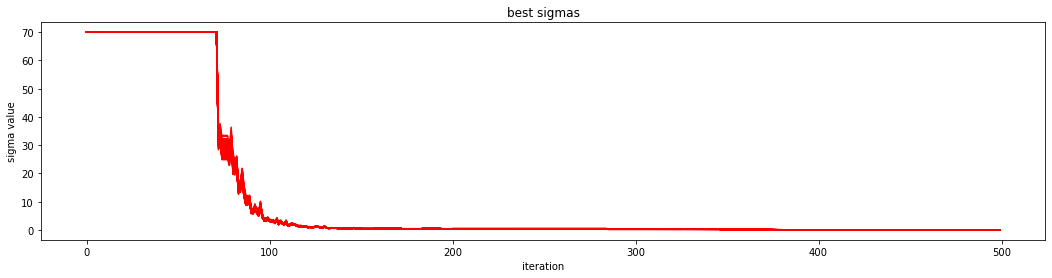

In [80]:
d = 100
N = 2000
T = 500
k = 0.7
s = 70.0
n_of_p = 3

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -242270.55042182, mean score = -333888.30052384.
Iteration 0020 : best score = -242270.55042182, mean score = -329586.76826450.
Iteration 0040 : best score = -196018.48399053, mean score = -313879.96691023.
Iteration 0060 : best score = -22124.16249436, mean score = -26232.78597355.
Iteration 0080 : best score = -5376.83824940, mean score = -6128.62136497.
Iteration 0100 : best score = -2084.37745315, mean score = -2346.57660018.
Iteration 0120 : best score = -1371.73410333, mean score = -1583.98059548.
Iteration 0140 : best score = -1241.93470589, mean score = -1392.76436498.
Iteration 0160 : best score = -1164.01108230, mean score = -1306.76017058.
Iteration 0180 : best score = -1135.44087857, mean score = -1260.11185378.
Iteration 0200 : best score = -1098.78490993, mean score = -1222.33546850.
Iteration 0220 : best score = -630.52961560, mean score = -665.99979555.
Iteration 0240 : best score = -472.46697725, mean score = -482.82732099.
Iteration 0260 

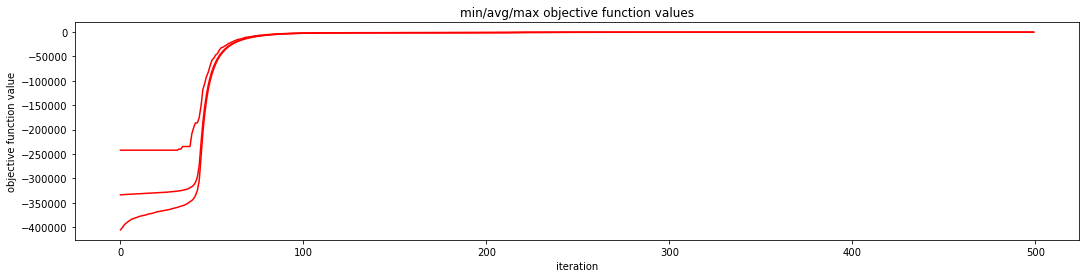

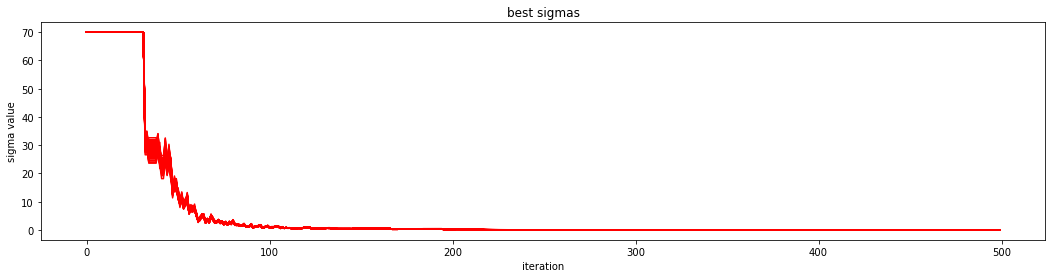

In [82]:
d = 100
N = 2000
T = 500
k = 0.8
s = 70.0
n_of_p = 4

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -232207.25743745, mean score = -334137.87105547.
Iteration 0020 : best score = -232207.25743745, mean score = -333750.56418102.
Iteration 0040 : best score = -232207.25743745, mean score = -333524.03835926.
Iteration 0060 : best score = -232207.25743745, mean score = -333257.34697858.
Iteration 0080 : best score = -232207.25743745, mean score = -332355.49923297.
Iteration 0100 : best score = -201195.24483112, mean score = -229604.99067785.
Iteration 0120 : best score = -105096.01149063, mean score = -120413.28484588.
Iteration 0140 : best score = -54199.73531081, mean score = -61381.53198200.
Iteration 0160 : best score = -27042.51753543, mean score = -30829.64856590.
Iteration 0180 : best score = -14400.92896059, mean score = -16185.31459908.
Iteration 0200 : best score = -8227.67198077, mean score = -8988.91599678.
Iteration 0220 : best score = -4838.97905182, mean score = -5361.86103811.
Iteration 0240 : best score = -2890.76940653, mean score = -3275.8

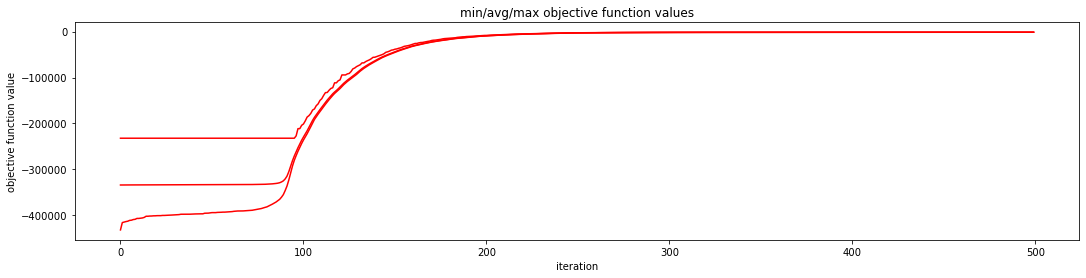

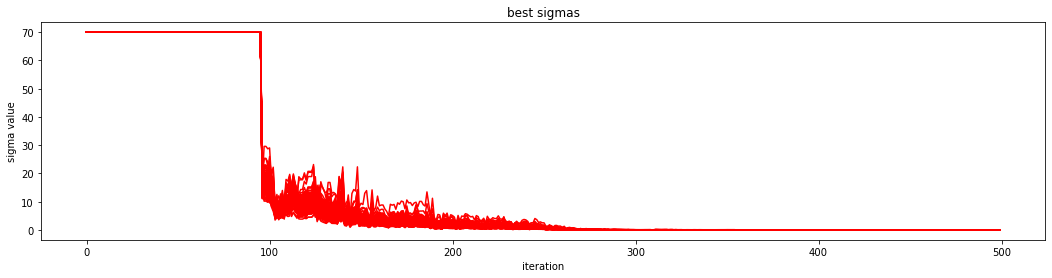

In [83]:
d = 100
N = 2000
T = 500
k = 0.7
s = 70.0
n_of_p = 1

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -221877.50759873, mean score = -333789.69306689.
Iteration 0020 : best score = -221877.50759873, mean score = -331381.65282196.
Iteration 0040 : best score = -221877.50759873, mean score = -329188.05744773.
Iteration 0060 : best score = -221877.50759873, mean score = -327009.67079877.
Iteration 0080 : best score = -221877.50759873, mean score = -322748.64761477.
Iteration 0100 : best score = -110758.95952678, mean score = -171168.74214805.
Iteration 0120 : best score = -8568.20849259, mean score = -11346.10757001.
Iteration 0140 : best score = -2511.91039747, mean score = -2911.49652186.
Iteration 0160 : best score = -1464.93722962, mean score = -1660.37771194.
Iteration 0180 : best score = -1230.64306105, mean score = -1399.26154837.
Iteration 0200 : best score = -1137.34954054, mean score = -1298.87235017.
Iteration 0220 : best score = -1107.06223213, mean score = -1245.40990856.
Iteration 0240 : best score = -1047.80466384, mean score = -1211.57032736.


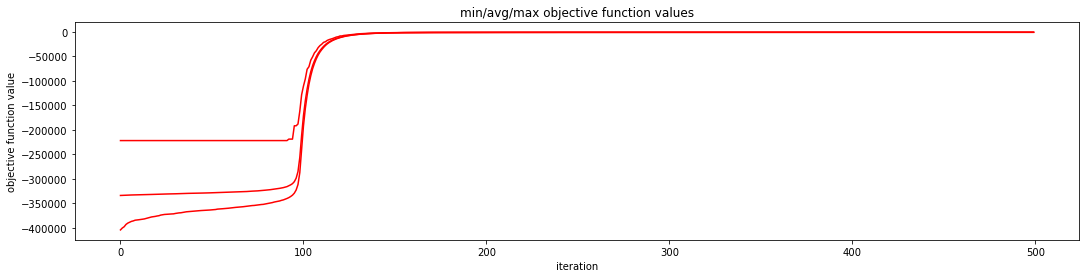

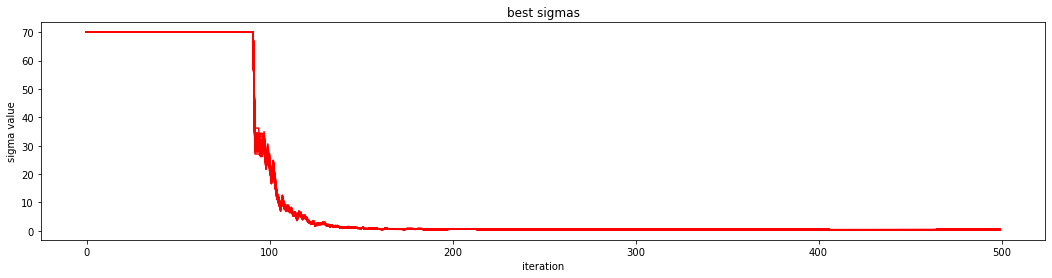

In [84]:
d = 100
N = 2000
T = 500
k = 0.7
s = 70.0
n_of_p = 10

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -246916.04160604, mean score = -333865.61632027.
Iteration 0040 : best score = -246916.04160604, mean score = -329605.20418910.
Iteration 0080 : best score = -246916.04160604, mean score = -324920.66954102.
Iteration 0120 : best score = -38721.65754475, mean score = -54076.62538264.
Iteration 0160 : best score = -1982.56500783, mean score = -2247.03550382.
Iteration 0200 : best score = -1193.16236456, mean score = -1349.49073434.
Iteration 0240 : best score = -1089.00350757, mean score = -1231.86888787.
Iteration 0280 : best score = -1054.67283724, mean score = -1183.89239926.
Iteration 0320 : best score = -1011.02928350, mean score = -1156.13804196.
Iteration 0360 : best score = -1011.02928350, mean score = -1138.18643757.
Iteration 0400 : best score = -1011.02928350, mean score = -1123.16876657.
Iteration 0440 : best score = -978.34011313, mean score = -1111.93747849.
Iteration 0480 : best score = -978.34011313, mean score = -1102.45370318.
Iteration 052

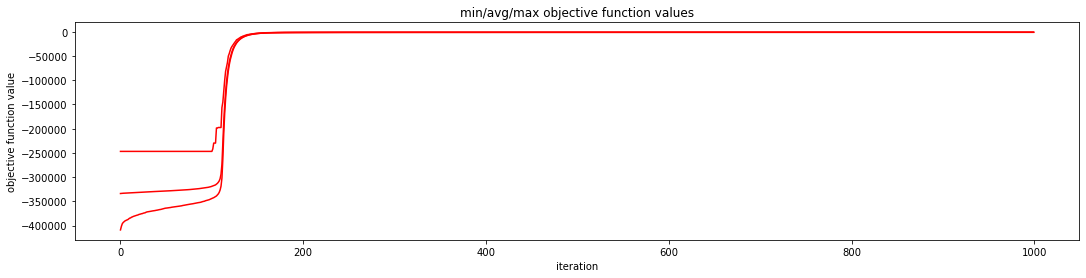

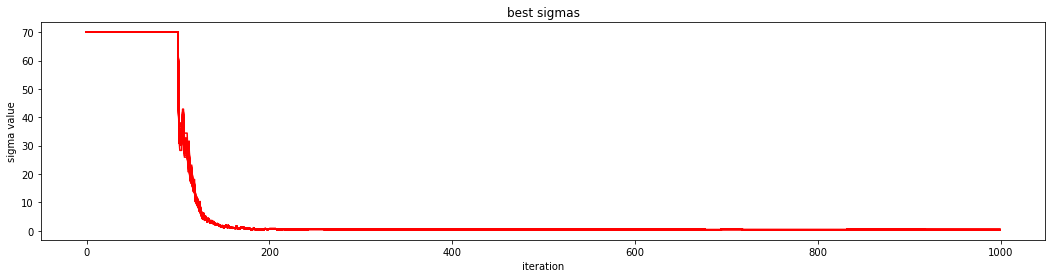

In [85]:
d = 100
N = 2000
T = 1000
k = 0.7
s = 70.0
n_of_p = 10

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 40)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Schwefela F7

Iteration 0000 : best score = -3698.94954345, mean score = -3941.66727870.
Iteration 0010 : best score = -3554.03853295, mean score = -3556.41461915.
Iteration 0020 : best score = -3553.48028997, mean score = -3553.48526947.
Iteration 0030 : best score = -3553.47918184, mean score = -3553.47919104.
Iteration 0040 : best score = -3553.47918049, mean score = -3553.47918050.
Iteration 0050 : best score = -3553.47918048, mean score = -3553.47918048.
Iteration 0060 : best score = -3553.47918048, mean score = -3553.47918048.
Iteration 0070 : best score = -3553.47918048, mean score = -3553.47918048.
Iteration 0080 : best score = -3553.47918048, mean score = -3553.47918048.
Iteration 0090 : best score = -3553.47918048, mean score = -3553.47918048.


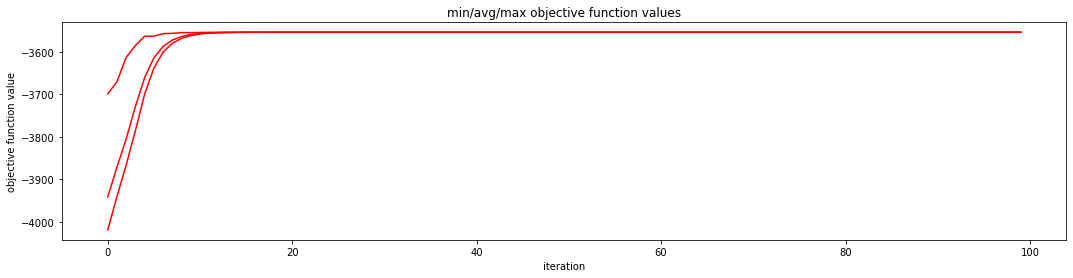

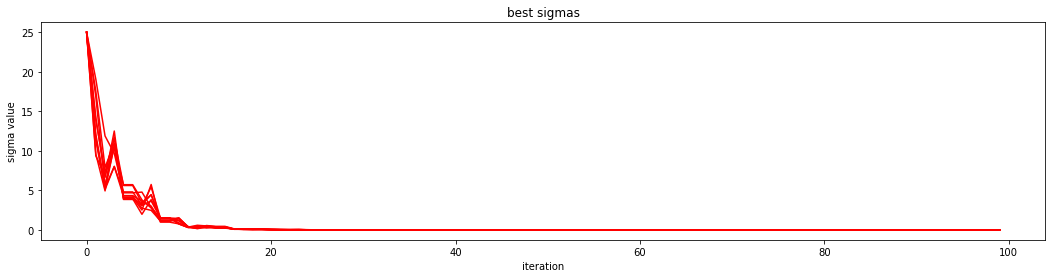

In [94]:
d = 10
N = 2000
T = 100
k = 0.7
s = 25.0
n_of_p = 2

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -7323.22854769, mean score = -8011.74553433.
Iteration 0010 : best score = -7022.90691781, mean score = -7170.47059261.
Iteration 0020 : best score = -6861.63009416, mean score = -7108.10057978.
Iteration 0030 : best score = -5767.33409524, mean score = -6062.23139448.
Iteration 0040 : best score = -5605.54376626, mean score = -5622.24780341.
Iteration 0050 : best score = -5587.61492218, mean score = -5588.64376305.
Iteration 0060 : best score = -5587.34739393, mean score = -5587.37041934.
Iteration 0070 : best score = -5587.32616492, mean score = -5587.32690513.
Iteration 0080 : best score = -5587.32556222, mean score = -5587.32558311.
Iteration 0090 : best score = -5587.32554803, mean score = -5587.32554860.


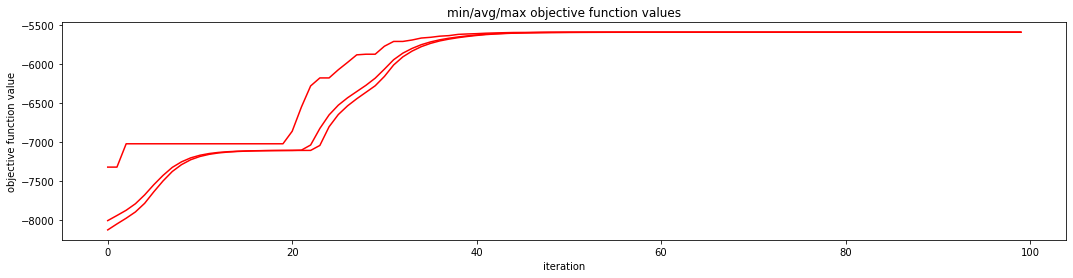

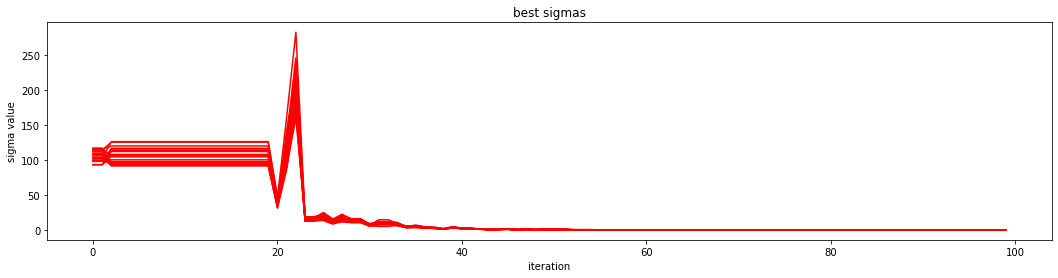

In [98]:
d = 20
N = 2000
T = 100
k = 0.5
s = 35.0
n_of_p = 2

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -7569.30792800, mean score = -7993.92691540.
Iteration 0010 : best score = -7125.20960156, mean score = -7155.97829980.
Iteration 0020 : best score = -7107.35106763, mean score = -7107.95645058.
Iteration 0030 : best score = -7106.96958123, mean score = -7106.98662122.
Iteration 0040 : best score = -7106.95866415, mean score = -7106.95913197.
Iteration 0050 : best score = -7106.95836945, mean score = -7106.95838398.
Iteration 0060 : best score = -7106.95836130, mean score = -7106.95836169.
Iteration 0070 : best score = -7106.95836098, mean score = -7106.95836099.
Iteration 0080 : best score = -7106.95836097, mean score = -7106.95836097.
Iteration 0090 : best score = -7106.95836097, mean score = -7106.95836097.


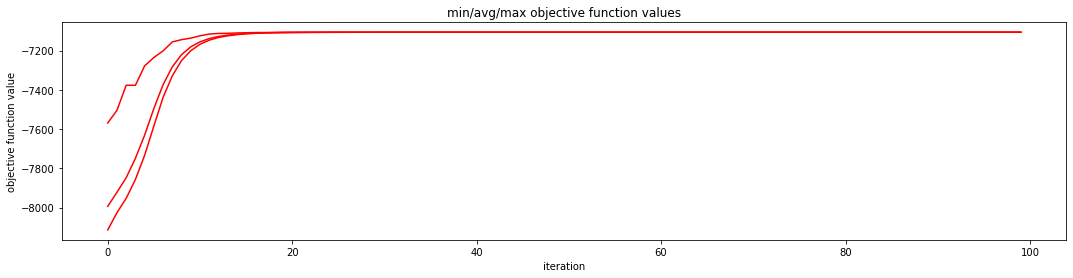

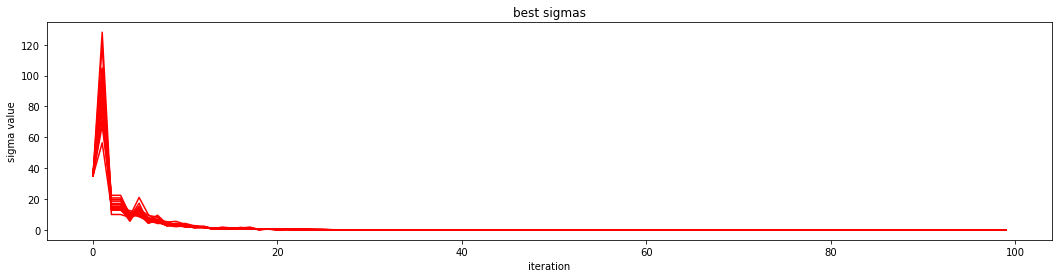

In [101]:
d = 20
N = 2000
T = 100
k = 1.0
s = 35.0
n_of_p = 3

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -19581.25546470, mean score = -20252.36926890.
Iteration 0010 : best score = -14580.86380409, mean score = -19518.28895244.
Iteration 0020 : best score = 27910.68163355, mean score = -11151.16205782.
Iteration 0030 : best score = 363370.47885510, mean score = 71001.33922846.
Iteration 0040 : best score = 2353997.03215742, mean score = 542365.70224952.
Iteration 0050 : best score = 10993755.47946512, mean score = 3076025.30656113.
Iteration 0060 : best score = 104015838.74447632, mean score = 18707838.46452835.
Iteration 0070 : best score = 403032377.22104907, mean score = 102426560.03909476.
Iteration 0080 : best score = 2295866071.52958870, mean score = 632901186.84829664.
Iteration 0090 : best score = 12182716505.67119789, mean score = 3336060891.80311823.


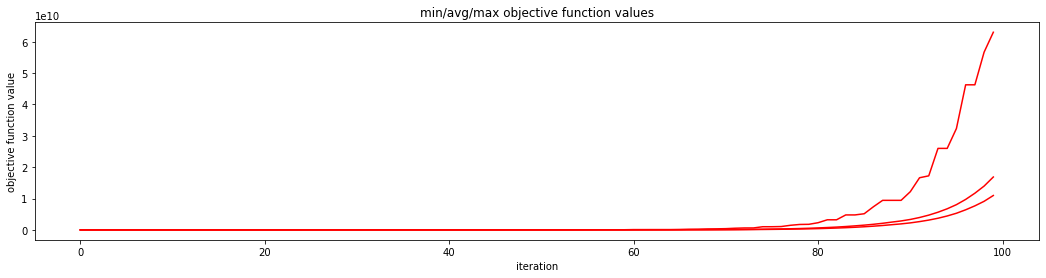

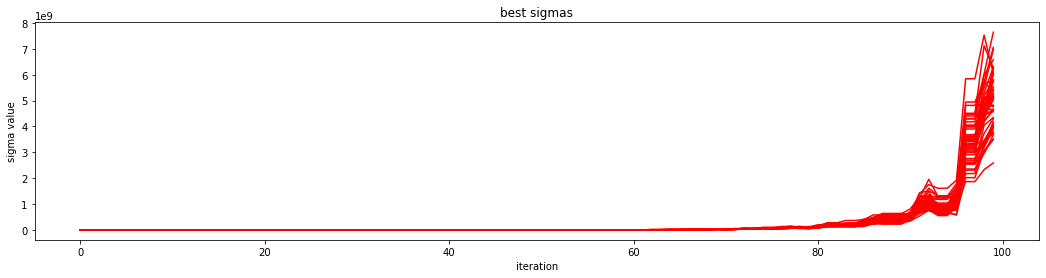

In [103]:
d = 50
N = 2000
T = 100
k = 1.0
s = 50.0
n_of_p = 2

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -19598.80800993, mean score = -20232.70491023.
Iteration 0010 : best score = -18208.41097120, mean score = -18435.17188073.
Iteration 0020 : best score = -17827.76449288, mean score = -17866.34923873.
Iteration 0030 : best score = -17780.33159254, mean score = -17787.59621330.
Iteration 0040 : best score = -17770.71423858, mean score = -17771.78378198.
Iteration 0050 : best score = -17768.13378279, mean score = -17768.43721041.
Iteration 0060 : best score = -17767.56915303, mean score = -17767.63480356.
Iteration 0070 : best score = -17767.43709517, mean score = -17767.45129462.
Iteration 0080 : best score = -17767.40662854, mean score = -17767.40998212.
Iteration 0090 : best score = -17767.39863085, mean score = -17767.39966364.


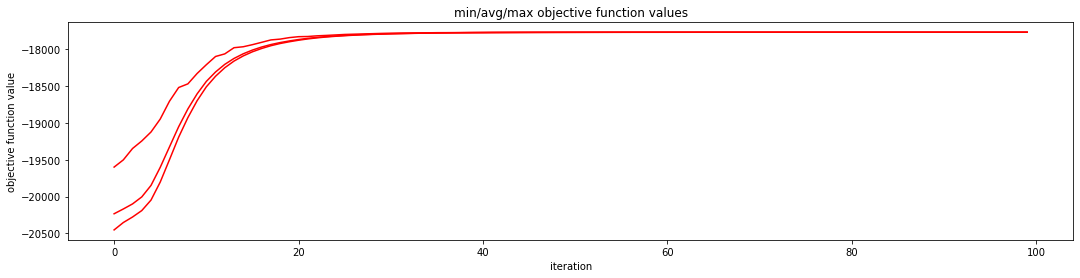

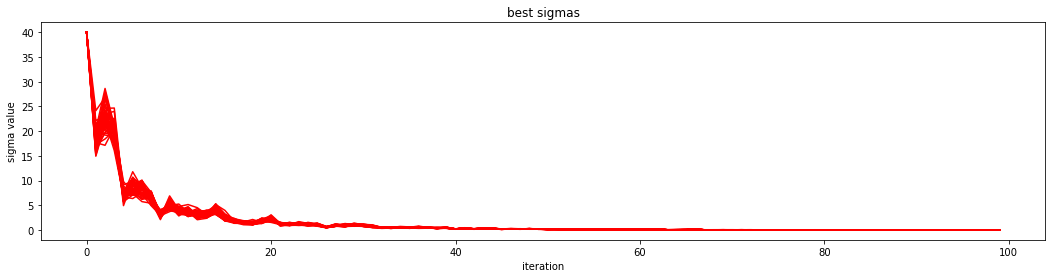

In [104]:
d = 50
N = 2000
T = 100
k = 1.0
s = 40.0
n_of_p = 2

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -19512.01368592, mean score = -20226.41545055.
Iteration 0010 : best score = -18179.47090803, mean score = -18488.19386153.
Iteration 0020 : best score = -17835.32941725, mean score = -17866.68483360.
Iteration 0030 : best score = -17783.04609198, mean score = -17788.74005294.
Iteration 0040 : best score = -17770.40762100, mean score = -17772.23857262.
Iteration 0050 : best score = -17768.16838949, mean score = -17768.44534354.
Iteration 0060 : best score = -17767.56817496, mean score = -17767.63184783.
Iteration 0070 : best score = -17767.43426404, mean score = -17767.45302538.
Iteration 0080 : best score = -17767.40487898, mean score = -17767.40883091.
Iteration 0090 : best score = -17767.39804288, mean score = -17767.39882461.


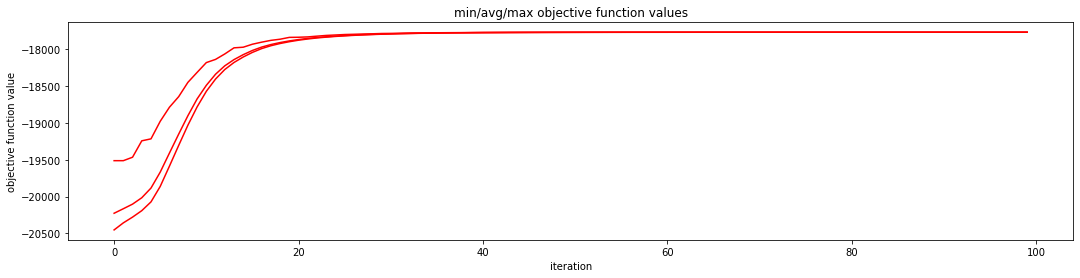

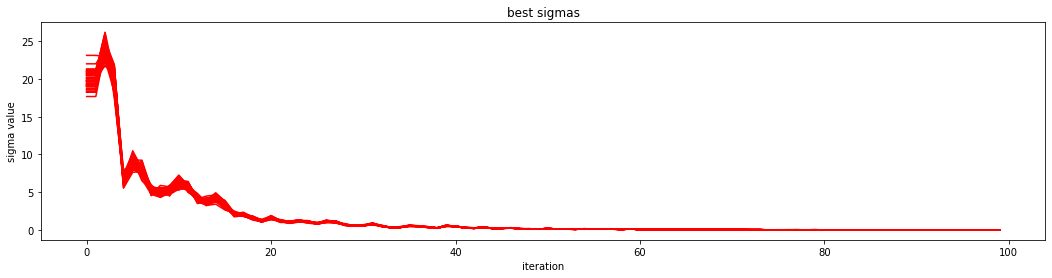

In [105]:
d = 50
N = 2000
T = 100
k = 0.5
s = 40.0
n_of_p = 2

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -19508.17075124, mean score = -20205.63379265.
Iteration 0010 : best score = -18015.63263174, mean score = -18257.08262822.
Iteration 0020 : best score = -17818.47232649, mean score = -17840.24778532.
Iteration 0030 : best score = -17779.97853133, mean score = -17784.05355952.
Iteration 0040 : best score = -17770.33087700, mean score = -17771.64520738.
Iteration 0050 : best score = -17768.19432462, mean score = -17768.49066151.
Iteration 0060 : best score = -17767.60087325, mean score = -17767.67956652.
Iteration 0070 : best score = -17767.45528277, mean score = -17767.47080270.
Iteration 0080 : best score = -17767.41023772, mean score = -17767.41564998.
Iteration 0090 : best score = -17767.39972065, mean score = -17767.40110626.


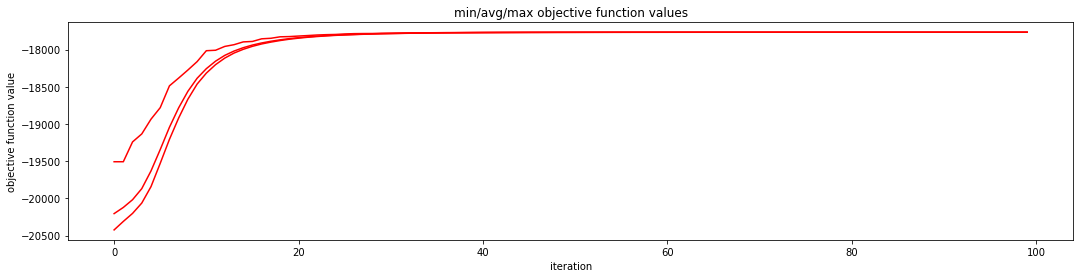

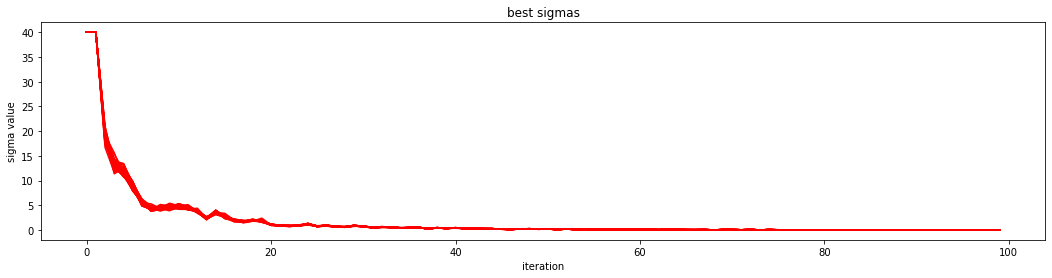

In [110]:
d = 50
N = 2000
T = 100
k = 0.5
s = 40.0
n_of_p = 3

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -19331.33702133, mean score = -20130.77632130.
Iteration 0010 : best score = -17901.99548504, mean score = -17980.69942204.
Iteration 0020 : best score = -17784.18592801, mean score = -17791.02903348.
Iteration 0030 : best score = -17769.87626763, mean score = -17770.74511357.
Iteration 0040 : best score = -17767.75197204, mean score = -17767.86458358.
Iteration 0050 : best score = -17767.43714122, mean score = -17767.46290095.
Iteration 0060 : best score = -17767.40155987, mean score = -17767.40426916.
Iteration 0070 : best score = -17767.39667479, mean score = -17767.39700783.
Iteration 0080 : best score = -17767.39601118, mean score = -17767.39606005.
Iteration 0090 : best score = -17767.39591962, mean score = -17767.39592585.


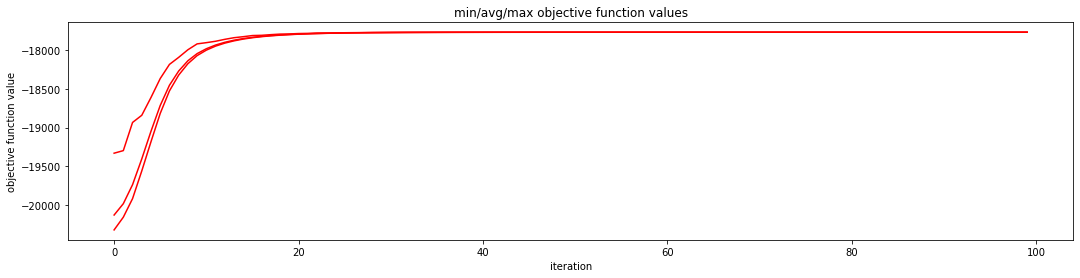

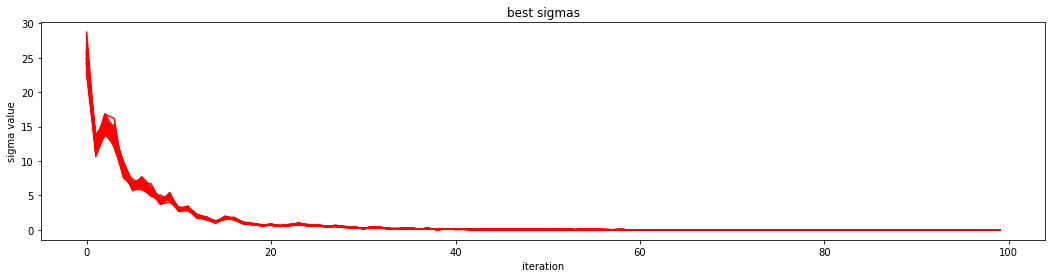

In [111]:
d = 50
N = 2000
T = 100
k = 0.5
s = 40.0
n_of_p = 3

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 4*N, n_of_p, s, k/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -19376.93834034, mean score = -20172.43421441.
Iteration 0010 : best score = -17949.00421263, mean score = -18047.44147152.
Iteration 0020 : best score = -17783.85273286, mean score = -17792.70720108.
Iteration 0030 : best score = -17769.15417691, mean score = -17769.92660285.
Iteration 0040 : best score = -17767.57293254, mean score = -17767.65561600.
Iteration 0050 : best score = -17767.41683575, mean score = -17767.42464921.
Iteration 0060 : best score = -17767.39795016, mean score = -17767.39917776.
Iteration 0070 : best score = -17767.39616550, mean score = -17767.39627293.
Iteration 0080 : best score = -17767.39593582, mean score = -17767.39594765.
Iteration 0090 : best score = -17767.39590618, mean score = -17767.39590798.


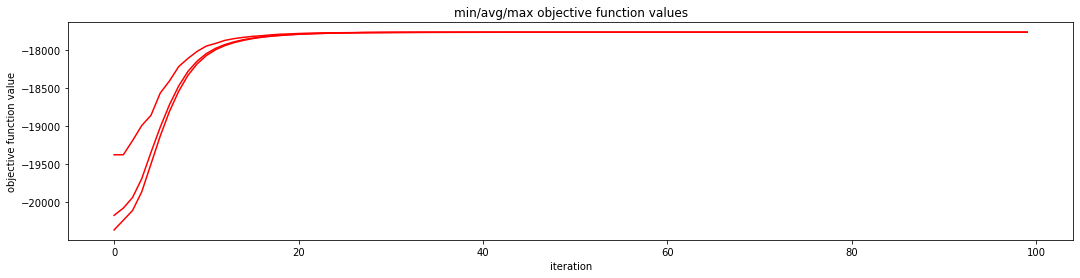

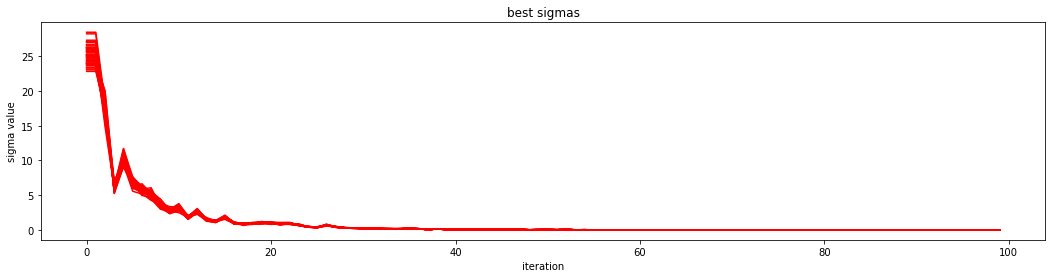

In [112]:
d = 50
N = 2000
T = 100
k = 0.5
s = 40.0
n_of_p = 2

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 4*N, n_of_p, s, k/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -39439.87510545, mean score = -40525.37996315.
Iteration 0010 : best score = -36549.05040608, mean score = -36778.49168300.
Iteration 0020 : best score = -35793.00286188, mean score = -35844.99552020.
Iteration 0030 : best score = -35611.97450931, mean score = -35632.79491473.
Iteration 0040 : best score = -35561.88786796, mean score = -35566.79822113.
Iteration 0050 : best score = -35544.41405598, mean score = -35545.79601538.
Iteration 0060 : best score = -35538.17266037, mean score = -35538.79932126.
Iteration 0070 : best score = -35535.90607266, mean score = -35536.18935897.
Iteration 0080 : best score = -35535.19242987, mean score = -35535.27117965.
Iteration 0090 : best score = -35534.93779181, mean score = -35534.96770943.


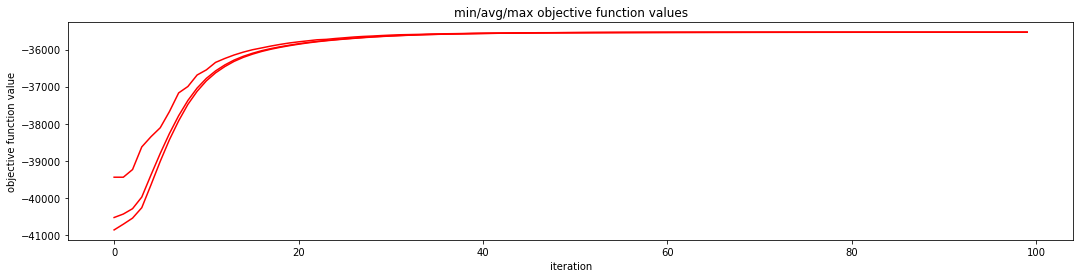

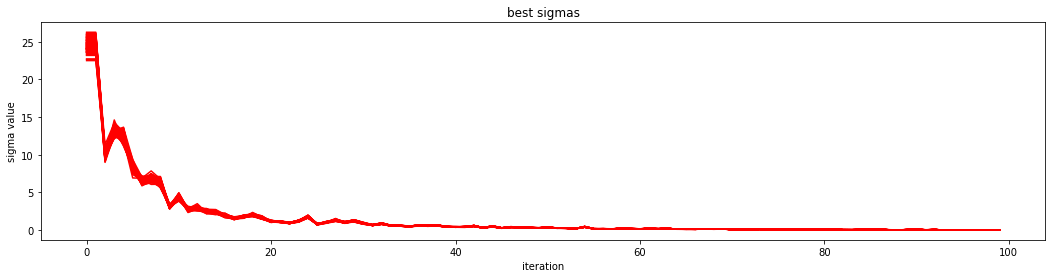

In [113]:
d = 100
N = 2000
T = 100
k = 0.5
s = 40.0
n_of_p = 2

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 4*N, n_of_p, s, k/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -39323.15887017, mean score = -40566.80013713.
Iteration 0010 : best score = -37122.23414261, mean score = -37741.82307235.
Iteration 0020 : best score = -36069.19862844, mean score = -36173.20383928.
Iteration 0030 : best score = -35762.81362690, mean score = -35802.71306851.
Iteration 0040 : best score = -35638.18561002, mean score = -35657.63125463.
Iteration 0050 : best score = -35583.52796249, mean score = -35592.27127160.
Iteration 0060 : best score = -35558.17971707, mean score = -35562.46959880.
Iteration 0070 : best score = -35545.78491520, mean score = -35548.11996898.
Iteration 0080 : best score = -35540.40598559, mean score = -35541.29659317.
Iteration 0090 : best score = -35537.32164536, mean score = -35537.79180261.
Iteration 0100 : best score = -35536.03623142, mean score = -35536.25172815.
Iteration 0110 : best score = -35535.39595733, mean score = -35535.51841083.
Iteration 0120 : best score = -35535.10720814, mean score = -35535.15428799.

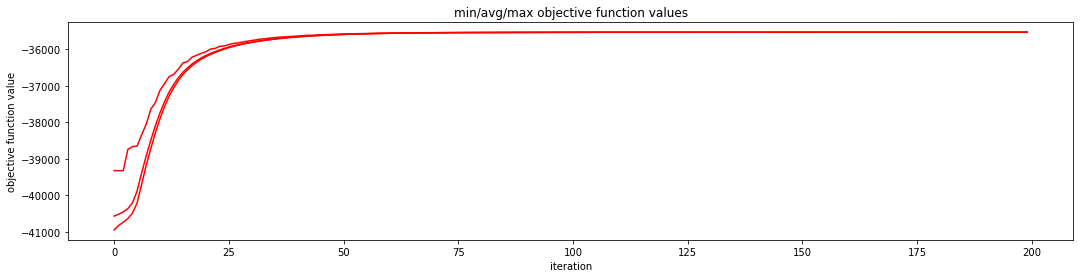

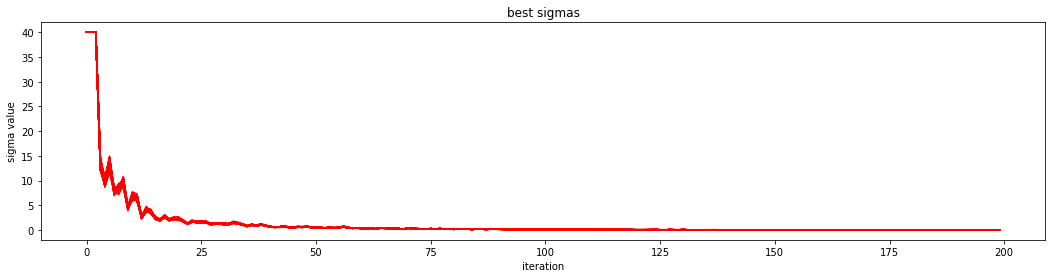

In [115]:
d = 100
N = 2000
T = 200
k = 0.5
s = 40.0
n_of_p = 2

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Griewanka F8

Iteration 0000 : best score = -2.70359867, mean score = -7.58155312.
Iteration 0010 : best score = -0.74310533, mean score = -1.05830077.
Iteration 0020 : best score = -0.06089747, mean score = -0.29505270.
Iteration 0030 : best score = -0.00021182, mean score = -0.00104548.
Iteration 0040 : best score = -0.00000060, mean score = -0.00000397.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000001.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = 0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = 0.00000000, mean score = 0.00000000.


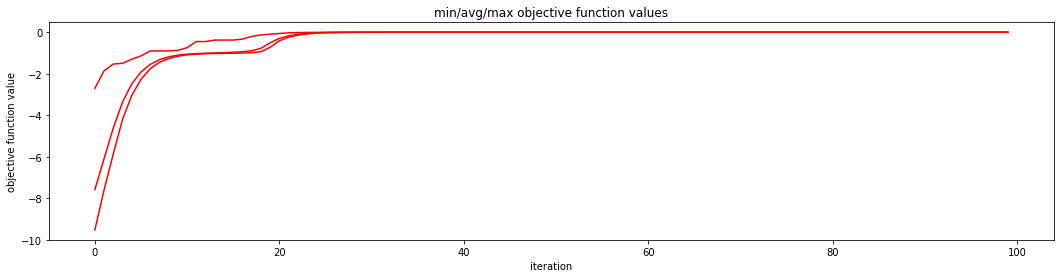

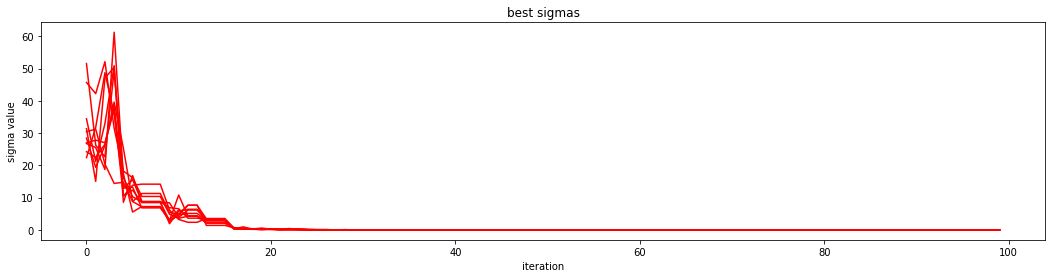

In [26]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -6.59504380, mean score = -15.36119155.
Iteration 0010 : best score = -1.38425818, mean score = -2.10752305.
Iteration 0020 : best score = -1.01602948, mean score = -1.06649108.
Iteration 0030 : best score = -0.26457353, mean score = -0.61752334.
Iteration 0040 : best score = -0.01721639, mean score = -0.06010318.
Iteration 0050 : best score = -0.00114255, mean score = -0.00412119.
Iteration 0060 : best score = -0.00008285, mean score = -0.00029913.
Iteration 0070 : best score = -0.00000510, mean score = -0.00002162.
Iteration 0080 : best score = -0.00000046, mean score = -0.00000161.
Iteration 0090 : best score = -0.00000004, mean score = -0.00000012.


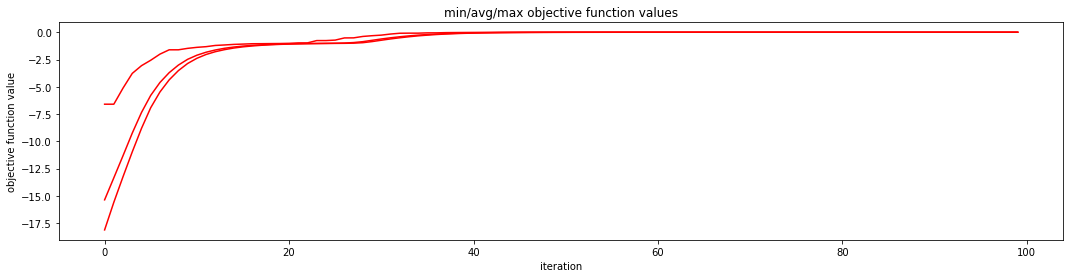

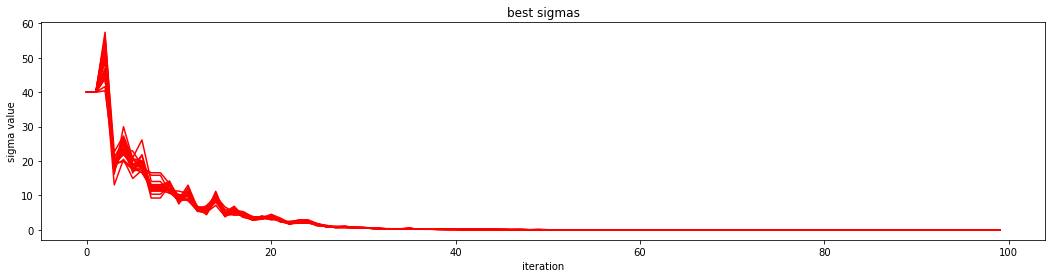

In [116]:
d = 20
N = 2000
T = 100
k = 0.5
s = 40.0
n_of_p = 2

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -25.53431541, mean score = -40.84238257.
Iteration 0020 : best score = -2.17160665, mean score = -2.64439934.
Iteration 0040 : best score = -1.07051693, mean score = -1.09518739.
Iteration 0060 : best score = -0.50707841, mean score = -0.59952040.
Iteration 0080 : best score = -0.15698120, mean score = -0.18193706.
Iteration 0100 : best score = -0.05353582, mean score = -0.06381556.
Iteration 0120 : best score = -0.01754563, mean score = -0.02015770.
Iteration 0140 : best score = -0.00614205, mean score = -0.00686021.
Iteration 0160 : best score = -0.00164129, mean score = -0.00211889.
Iteration 0180 : best score = -0.00026477, mean score = -0.00034090.


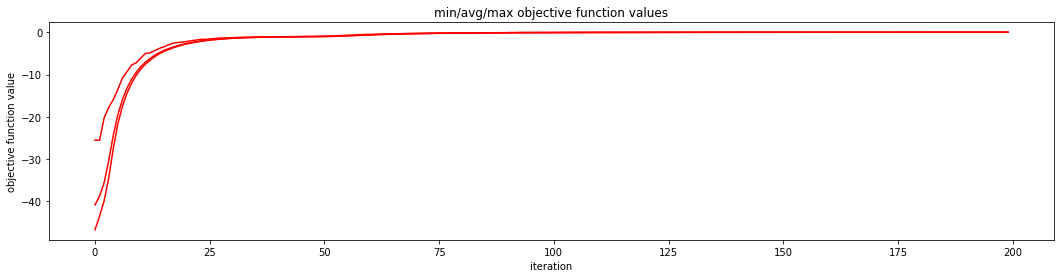

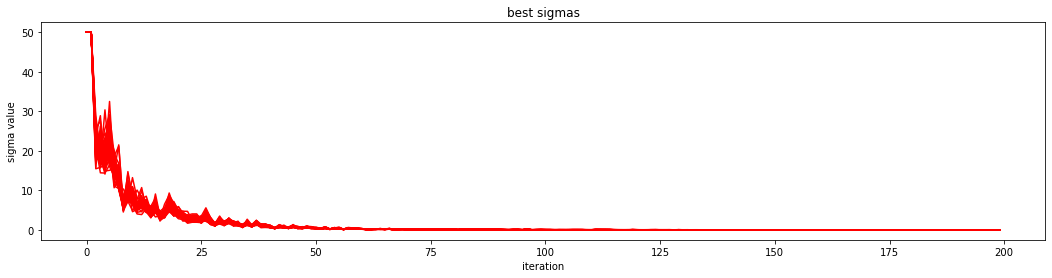

In [119]:
d = 50
N = 2000
T = 200
k = 1.2
s = 50.0
n_of_p = 2

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -25.94760647, mean score = -41.27191512.
Iteration 0020 : best score = -1.72611936, mean score = -2.04179059.
Iteration 0040 : best score = -0.90905465, mean score = -1.01691420.
Iteration 0060 : best score = -0.21970919, mean score = -0.25963878.
Iteration 0080 : best score = -0.06688430, mean score = -0.07741711.
Iteration 0100 : best score = -0.02240959, mean score = -0.02549126.
Iteration 0120 : best score = -0.00658704, mean score = -0.00799177.
Iteration 0140 : best score = -0.00165702, mean score = -0.00203485.
Iteration 0160 : best score = -0.00040849, mean score = -0.00050614.
Iteration 0180 : best score = -0.00008198, mean score = -0.00010431.
Iteration 0200 : best score = -0.00001522, mean score = -0.00001875.
Iteration 0220 : best score = -0.00000274, mean score = -0.00000339.
Iteration 0240 : best score = -0.00000050, mean score = -0.00000064.
Iteration 0260 : best score = -0.00000010, mean score = -0.00000012.
Iteration 0280 : best score = -0

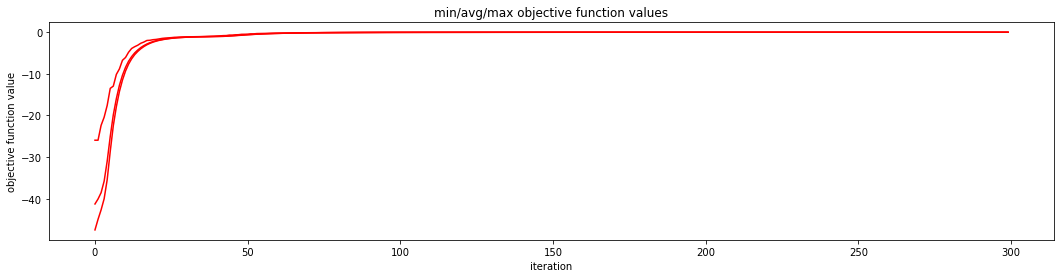

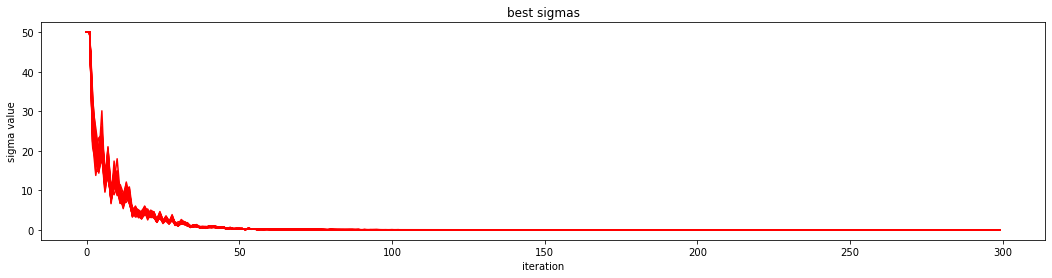

In [121]:
d = 50
N = 2000
T = 300
k = 0.8
s = 50.0
n_of_p = 2

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -60.00530818, mean score = -83.92925279.
Iteration 0020 : best score = -10.61415721, mean score = -12.62827396.
Iteration 0040 : best score = -2.53018214, mean score = -2.89300075.
Iteration 0060 : best score = -1.33401972, mean score = -1.38693918.
Iteration 0080 : best score = -1.06793022, mean score = -1.08235028.
Iteration 0100 : best score = -0.62977314, mean score = -0.68278443.
Iteration 0120 : best score = -0.33055492, mean score = -0.35359702.
Iteration 0140 : best score = -0.19268969, mean score = -0.20522333.
Iteration 0160 : best score = -0.10834676, mean score = -0.11678748.
Iteration 0180 : best score = -0.06615983, mean score = -0.07001984.
Iteration 0200 : best score = -0.04123283, mean score = -0.04325984.
Iteration 0220 : best score = -0.02486034, mean score = -0.02673917.
Iteration 0240 : best score = -0.01589278, mean score = -0.01681418.
Iteration 0260 : best score = -0.00956950, mean score = -0.01019427.
Iteration 0280 : best score = 

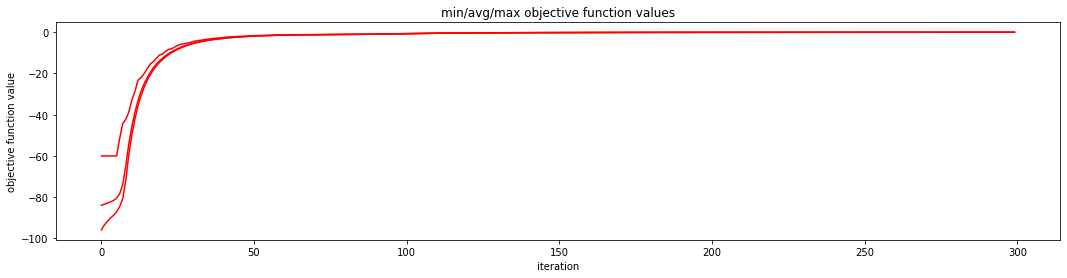

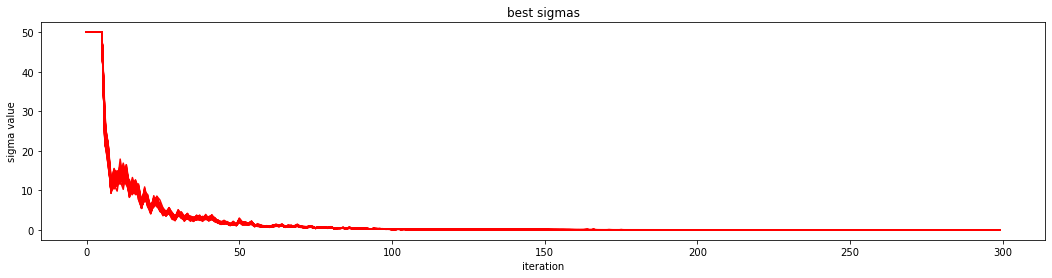

In [122]:
d = 100
N = 2000
T = 300
k = 0.8
s = 50.0
n_of_p = 2

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -60.39954466, mean score = -83.58110782.
Iteration 0020 : best score = -9.41674830, mean score = -11.36548683.
Iteration 0040 : best score = -2.68589306, mean score = -2.96120697.
Iteration 0060 : best score = -1.36319871, mean score = -1.43070982.
Iteration 0080 : best score = -1.07965070, mean score = -1.09615512.
Iteration 0100 : best score = -0.71320063, mean score = -0.77914003.
Iteration 0120 : best score = -0.40126804, mean score = -0.43055450.
Iteration 0140 : best score = -0.24559910, mean score = -0.25985695.
Iteration 0160 : best score = -0.15792110, mean score = -0.16686391.
Iteration 0180 : best score = -0.10540915, mean score = -0.11172338.
Iteration 0200 : best score = -0.07126854, mean score = -0.07514663.
Iteration 0220 : best score = -0.04952285, mean score = -0.05161110.
Iteration 0240 : best score = -0.03379420, mean score = -0.03559368.
Iteration 0260 : best score = -0.02391969, mean score = -0.02490875.
Iteration 0280 : best score = -

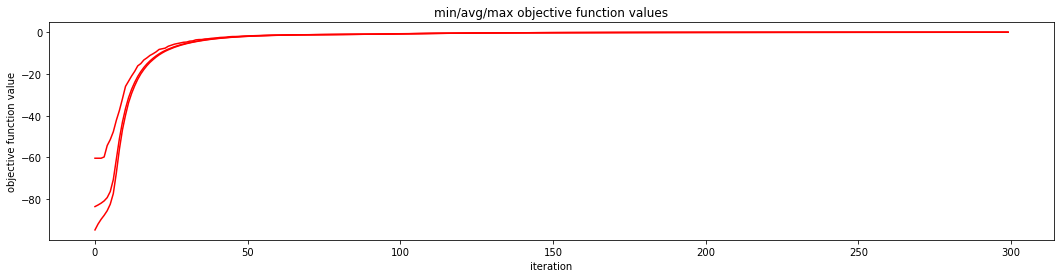

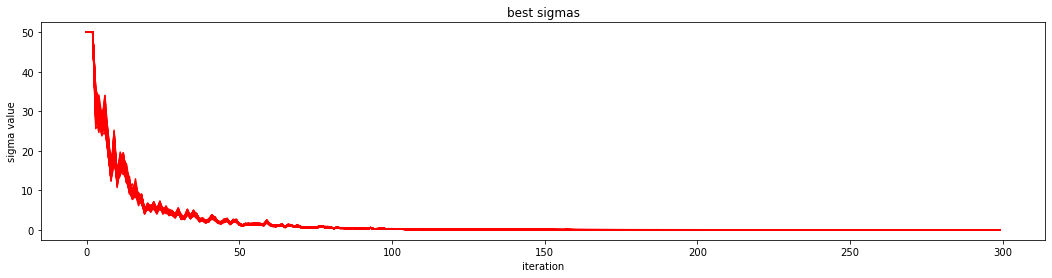

In [123]:
d = 100
N = 2000
T = 300
k = 0.8
s = 50.0
n_of_p = 3

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -62.97368742, mean score = -83.21955283.
Iteration 0020 : best score = -11.24087683, mean score = -13.08993338.
Iteration 0040 : best score = -3.63457322, mean score = -4.07483191.
Iteration 0060 : best score = -1.71504661, mean score = -1.82306580.
Iteration 0080 : best score = -1.20150536, mean score = -1.22884849.
Iteration 0100 : best score = -1.04836294, mean score = -1.06236890.
Iteration 0120 : best score = -0.64919849, mean score = -0.69881455.
Iteration 0140 : best score = -0.40415885, mean score = -0.42586070.
Iteration 0160 : best score = -0.25920998, mean score = -0.27244791.
Iteration 0180 : best score = -0.16687293, mean score = -0.17663078.
Iteration 0200 : best score = -0.10882399, mean score = -0.11425879.
Iteration 0220 : best score = -0.07127358, mean score = -0.07489363.
Iteration 0240 : best score = -0.04724007, mean score = -0.04939201.
Iteration 0260 : best score = -0.03074490, mean score = -0.03230583.
Iteration 0280 : best score = 

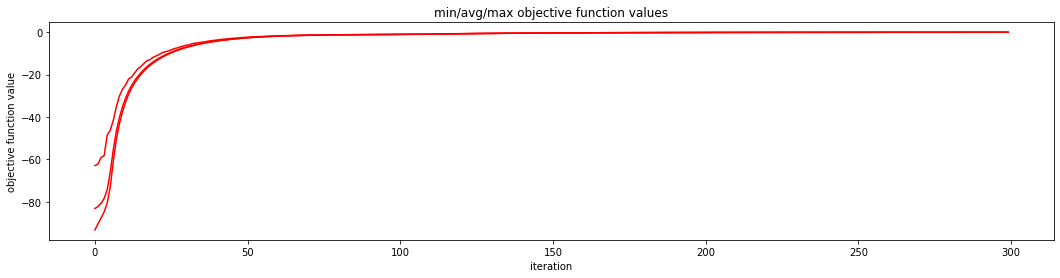

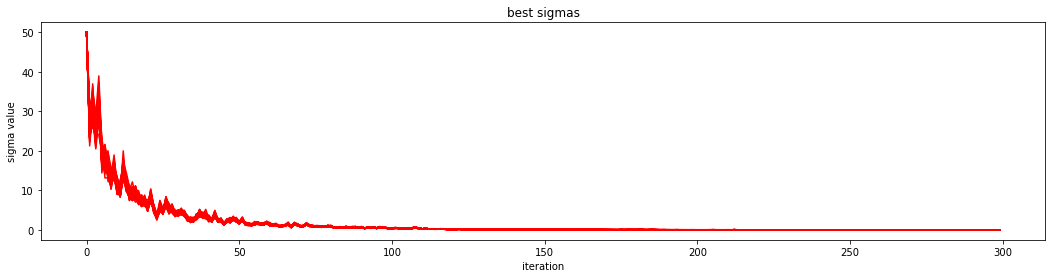

In [124]:
d = 100
N = 2000
T = 300
k = 1.0
s = 50.0
n_of_p = 3

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, n_of_p, s, k/np.sqrt(2*d), k/np.sqrt(2*np.sqrt(d)), 20)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()